In [46]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

dataset = pd.read_csv("../data/logfile-network-v8.csv", delimiter=";")

labels = np.unique(dataset['datacenter_name'])
simulation_duration = dataset['duration'][0]

dataset.head()

,datacenter_id,datacenter_name,id,type,role,level,bandwidth,total_used_bandwidth,traffic_history,ports,duration,active_duration,power_per_port,low_power,high_power,is_active,Unnamed: 16
0,0,Datacenter_1,0,switch,access switch,0,360000,2427.0,162.0:93.0:71.0:72.0:79.0:73.0:71.0:71.0:73.0:...,"400,True,0.24269999999999994,0,12,10000,2427.0...",3.6094,0.006742,1.39,81.84,81.84,True,NaN
1,0,Datacenter_1,1,switch,access switch,0,360000,3573.0,89.0:89.0:95.0:198.0:218.0:156.0:90.0:109.0:17...,"402,True,0.35729999999999995,1,12,10000,3573.0...",3.6094,0.009925,1.39,81.84,81.84,True,NaN
2,0,Datacenter_1,2,switch,access switch,0,360000,2492.0,94.0:68.0:73.0:61.0:73.0:83.0:74.0:63.0:73.0:7...,"404,True,0.24919999999999998,2,12,10000,2492.0...",3.6094,0.006922,1.39,81.84,81.84,True,NaN
3,0,Datacenter_1,3,switch,access switch,0,360000,2335.0,64.0:64.0:64.0:73.0:74.0:64.0:74.0:74.0:56.0:6...,"406,True,0.23349999999999999,3,12,10000,2335.0...",3.6094,0.006486,1.39,81.84,81.84,True,NaN
4,0,Datacenter_1,4,switch,access switch,0,360000,2436.0,70.0:64.0:57.0:75.0:72.0:65.0:75.0:66.0:63.0:7...,"408,True,0.24359999999999996,4,12,10000,2436.0...",3.6094,0.006767,1.39,81.84,81.84,True,NaN


### Maximum energy consumption of network

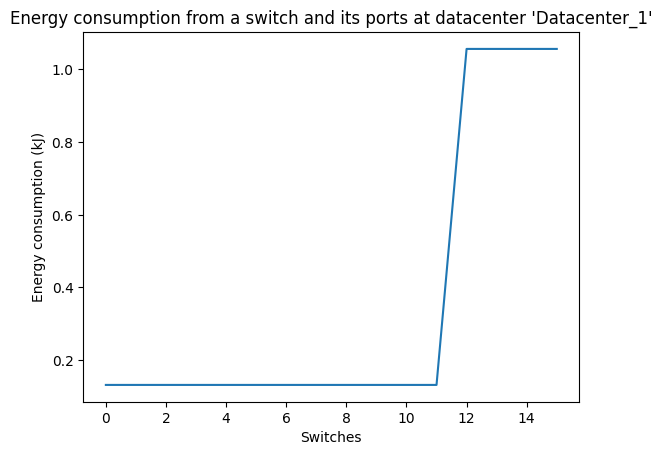

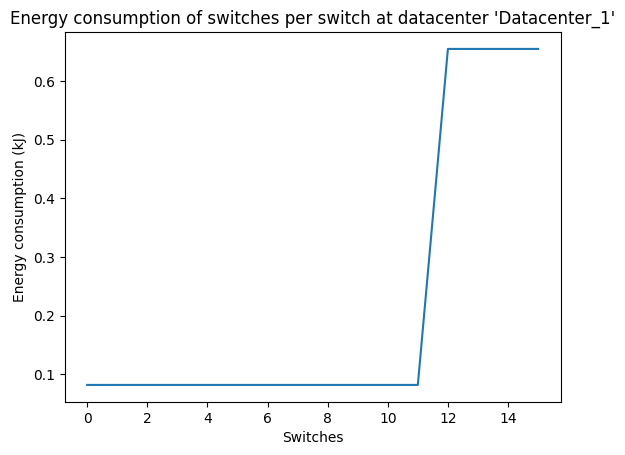

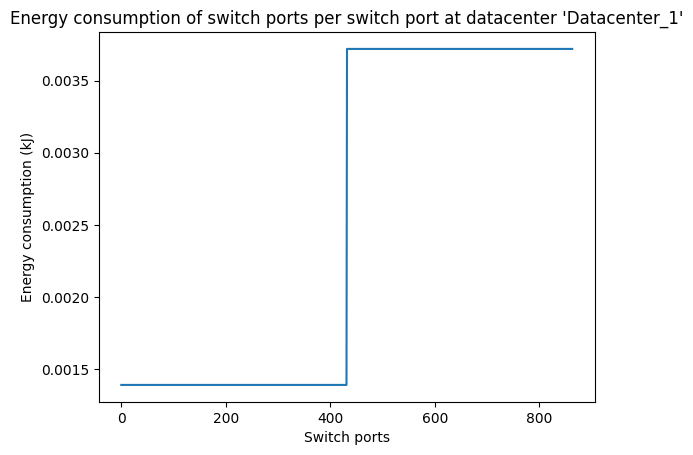

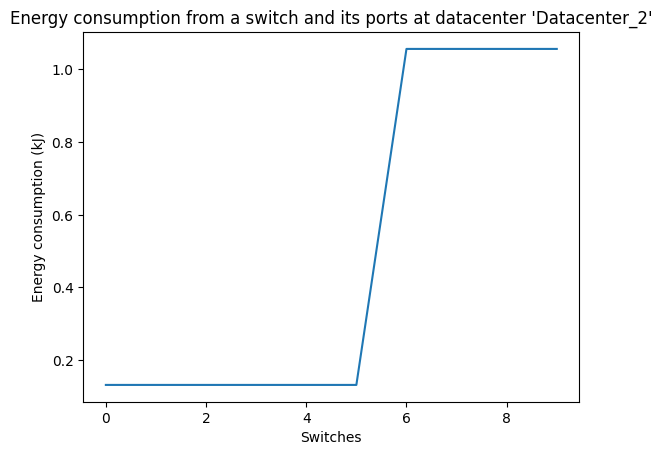

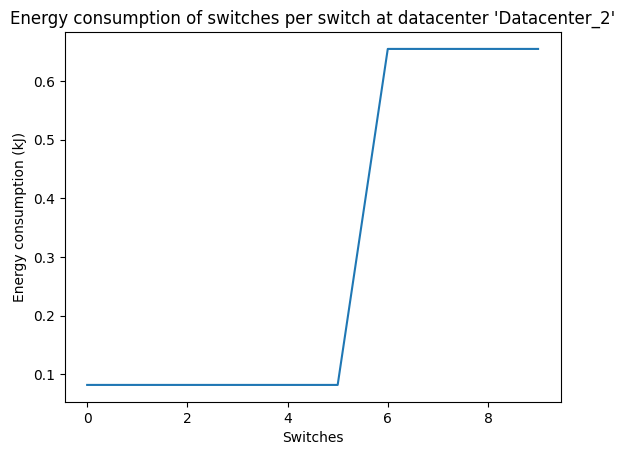

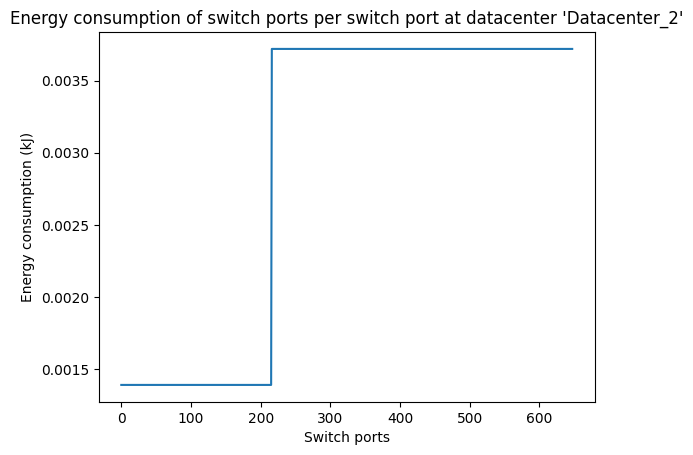

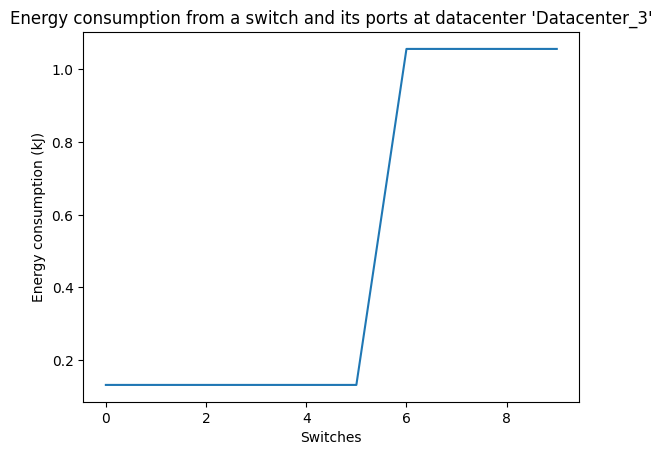

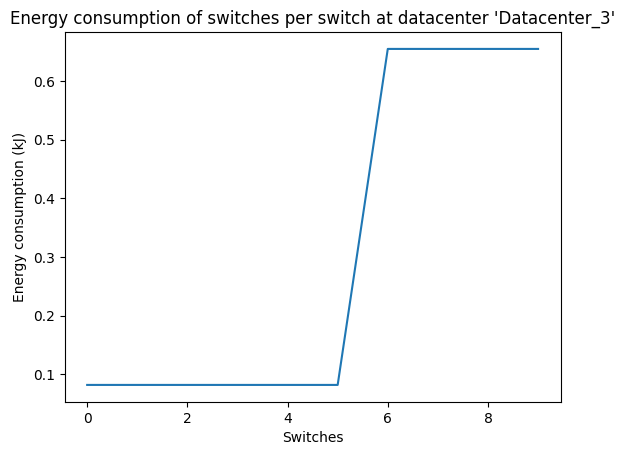

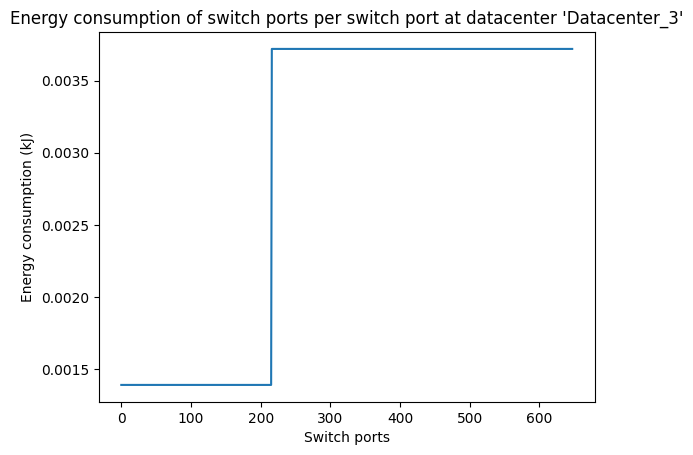

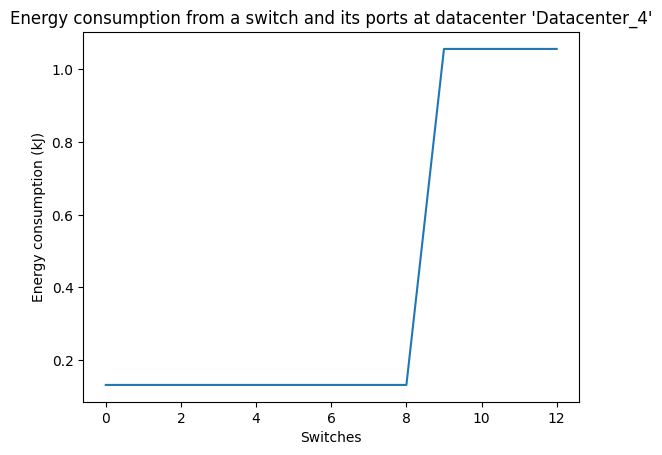

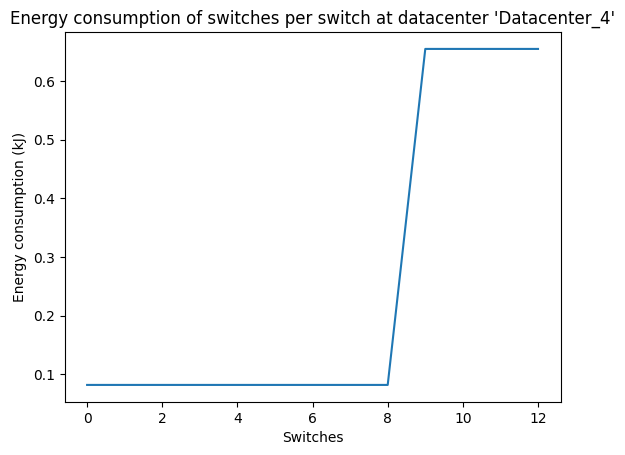

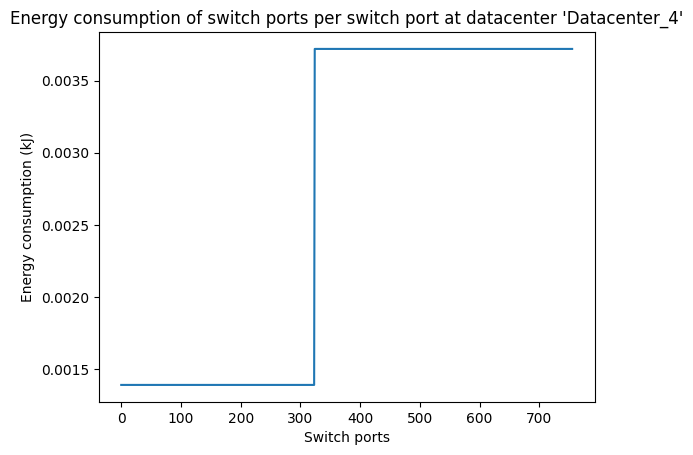

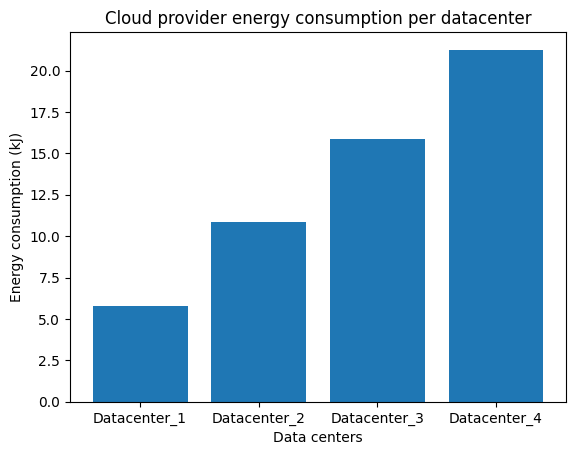

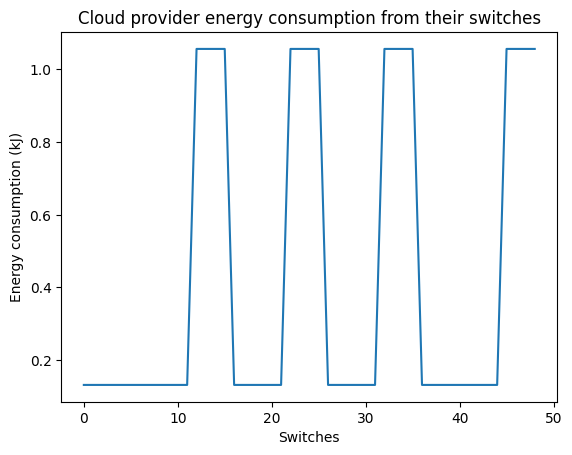

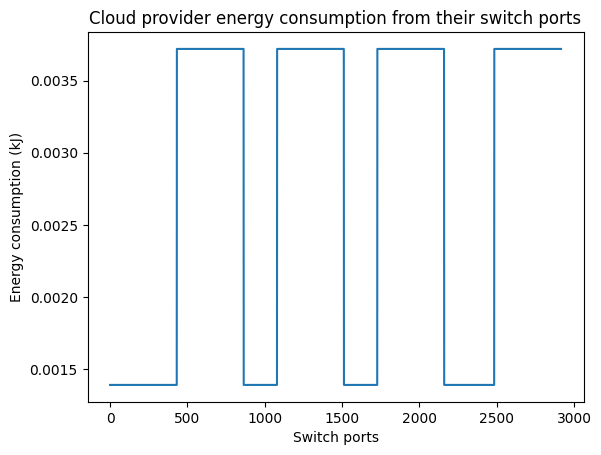

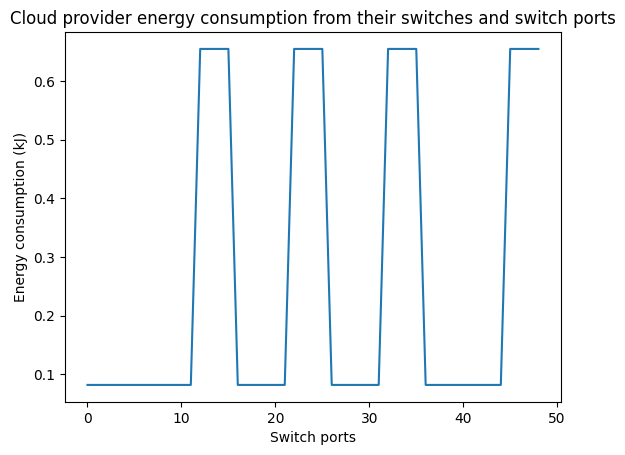

In [47]:
labels = np.unique(dataset['datacenter_name'])

cloud_provider_max_power_consumption_per_switch = np.array([])
cloud_provider_max_power_consumption_per_switch_port = np.array([])
cloud_provider_max_power_consumption_per_switch_combined = np.array([])
cloud_provider_max_power_consumption_per_datacenter = np.array([])

datacenter_max_power = np.array([])
datacenter_max_bw = np.array([])
datacenter_switches = np.array([])
datacenter_switchports = np.array([])

datacenters_max_power_consumption = []
for datacenter_name in labels:
    datacenter_max_power_consumption_per_switch = np.array([])
    datacenter_max_power_consumption_per_switch_port = np.array([])
    datacenter_max_power_consumption_per_switch_combined = np.array([])
    
    switches = 0
    switchports = 0
    bw = 0
    
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        max_power = 0
        max_switch_power = sample['high_power']
        max_power += max_switch_power
        
        bw += sample['bandwidth']
        
        switches += 1
        cloud_provider_max_power_consumption_per_switch = np.append(cloud_provider_max_power_consumption_per_switch, max_power)
        datacenter_max_power_consumption_per_switch = np.append(datacenter_max_power_consumption_per_switch, max_power)
        for port in range(len(sample['ports'].split(":"))-1):
            power_per_port = sample['power_per_port']
            cloud_provider_max_power_consumption_per_switch_port = np.append(cloud_provider_max_power_consumption_per_switch_port, power_per_port)
            datacenter_max_power_consumption_per_switch_port = np.append(datacenter_max_power_consumption_per_switch_port, power_per_port)
            max_power += power_per_port
            switchports += 1
        cloud_provider_max_power_consumption_per_switch_combined = np.append(cloud_provider_max_power_consumption_per_switch_combined, max_power)
        datacenter_max_power_consumption_per_switch_combined = np.append(datacenter_max_power_consumption_per_switch_combined, max_power)
    
    cloud_provider_max_power_consumption_per_datacenter = np.append(cloud_provider_max_power_consumption_per_datacenter, np.sum(cloud_provider_max_power_consumption_per_switch_combined))
    datacenters_max_power_consumption.append(datacenter_max_power_consumption_per_switch_combined)
    datacenter_max_power = np.append(datacenter_max_power, np.sum(datacenter_max_power_consumption_per_switch_combined))
    datacenter_switches = np.append(datacenter_switches, switches)
    datacenter_switchports = np.append(datacenter_switchports, switchports)
    datacenter_max_bw = np.append(datacenter_max_bw, bw)
    
    plt.plot(np.arange(len(datacenter_max_power_consumption_per_switch_combined)), (datacenter_max_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption from a switch and its ports at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_max_power_consumption_per_switch)), (datacenter_max_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switches per switch at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_max_power_consumption_per_switch_port)), (datacenter_max_power_consumption_per_switch_port / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switch ports")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switch ports per switch port at datacenter '{datacenter_name}'")
    plt.show()

plt.bar(np.arange(len(cloud_provider_max_power_consumption_per_datacenter)), (cloud_provider_max_power_consumption_per_datacenter / 1000) * 1, label="Energy consumption")
plt.xticks(np.arange(len(cloud_provider_max_power_consumption_per_datacenter)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.show()

plt.plot(np.arange(len(cloud_provider_max_power_consumption_per_switch_combined)), (cloud_provider_max_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
plt.xlabel("Switches")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches")
plt.show()

plt.plot(np.arange(len(cloud_provider_max_power_consumption_per_switch_port)), (cloud_provider_max_power_consumption_per_switch_port / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switch ports")
plt.show()

plt.plot(np.arange(len(cloud_provider_max_power_consumption_per_switch)), (cloud_provider_max_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches and switch ports")
plt.show()

### Current Energy Consumption

##### Current network infrastructure state energy consumption 

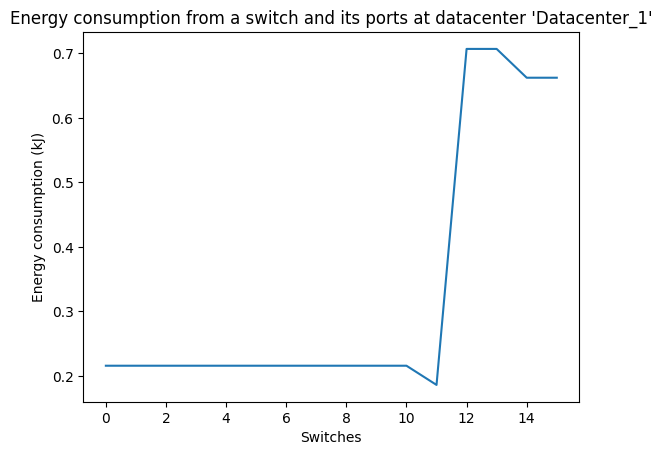

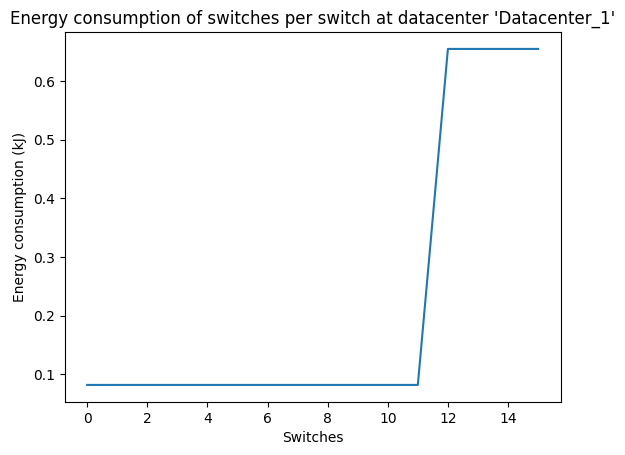

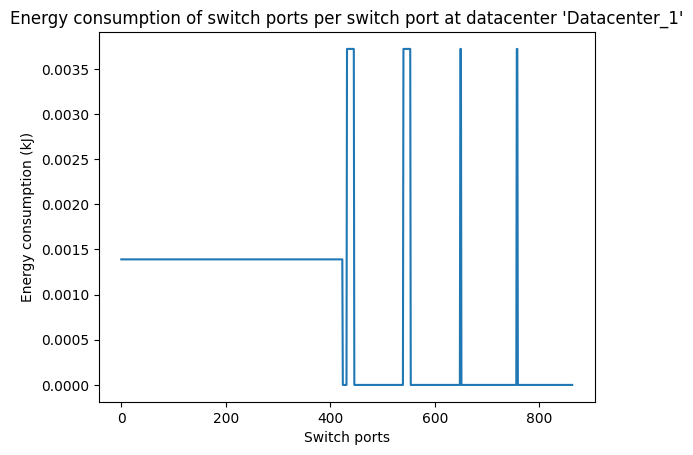

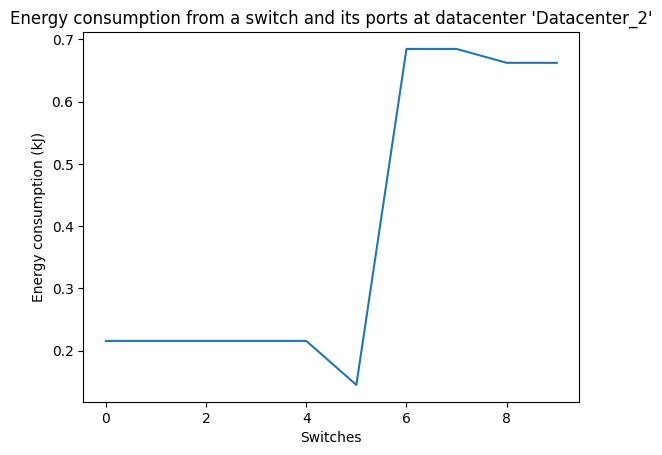

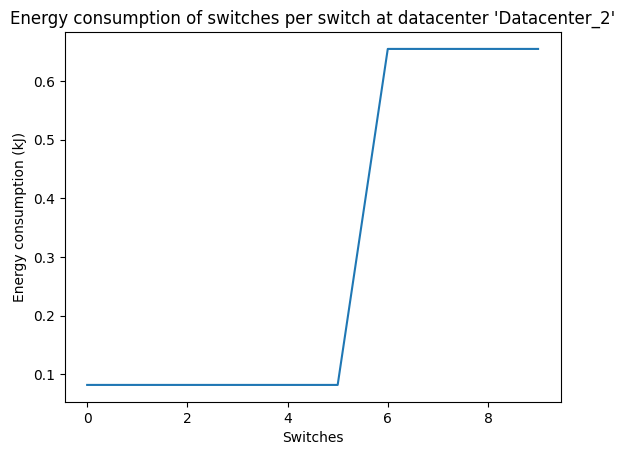

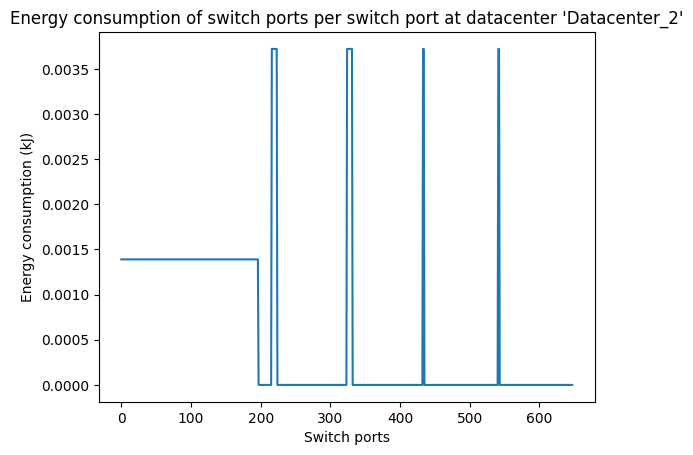

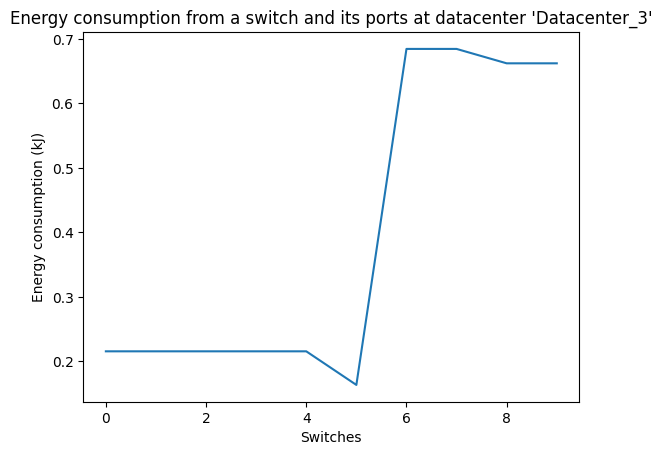

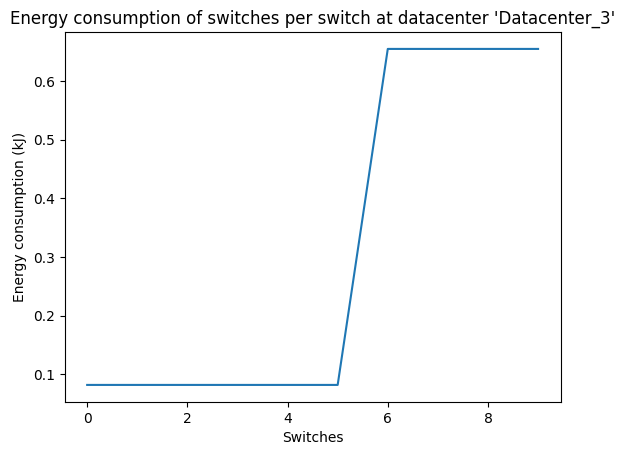

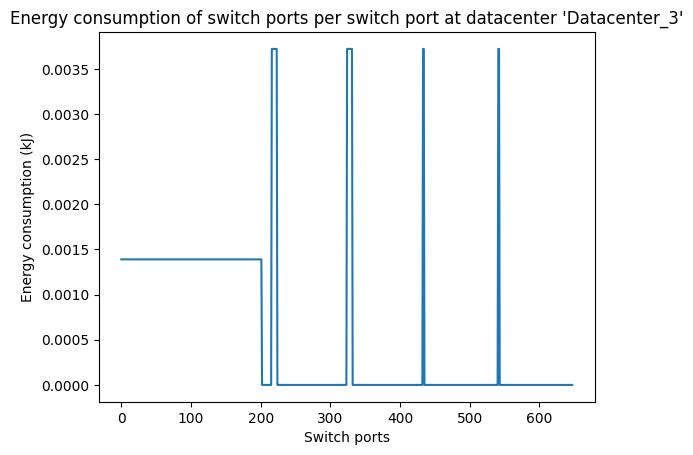

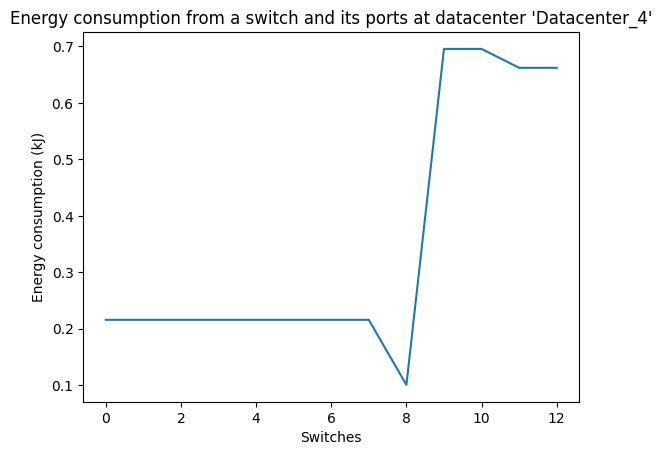

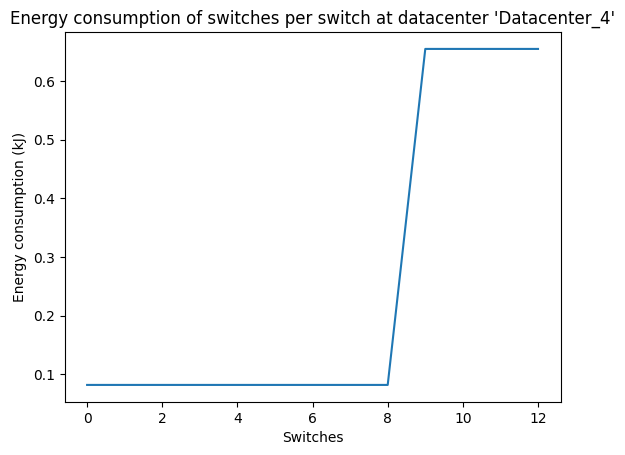

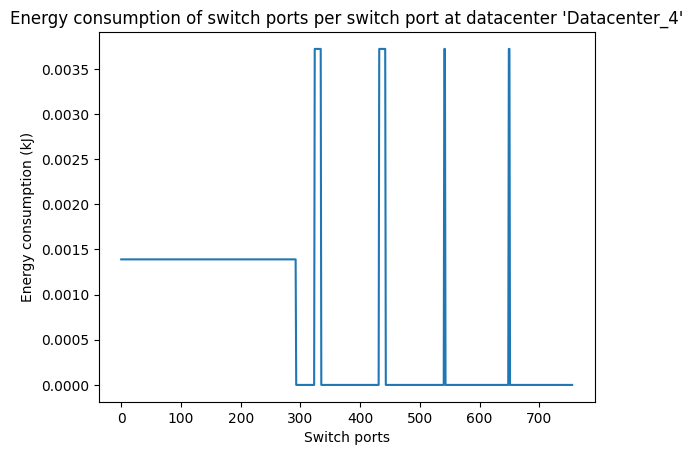

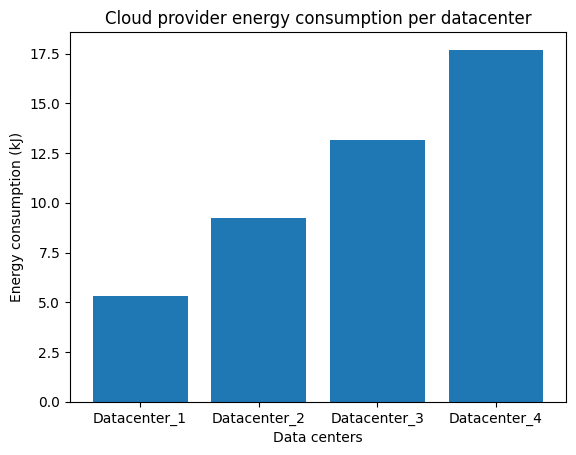

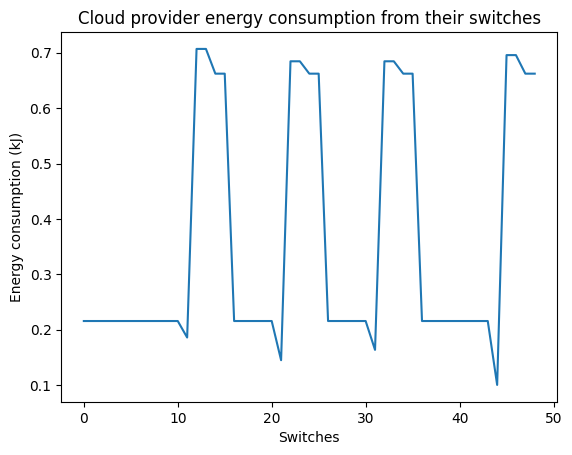

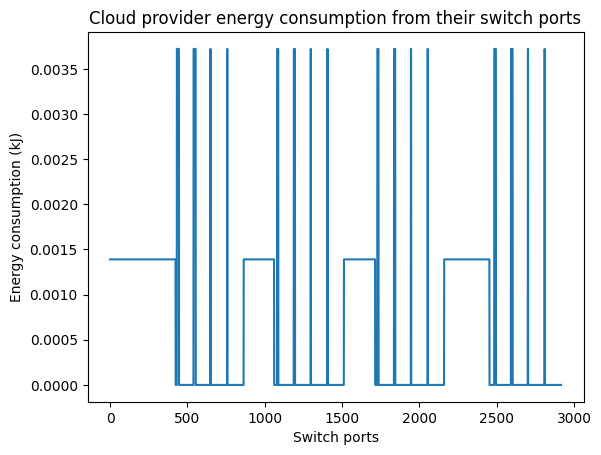

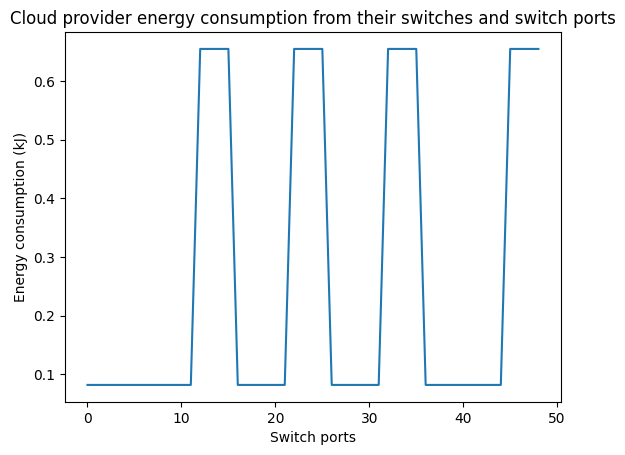

In [48]:
cloud_provider_current_state_power_consumption_per_switch = np.array([])
cloud_provider_current_state_power_consumption_per_switch_port = np.array([])
cloud_provider_current_state_power_consumption_per_switch_combined = np.array([])
cloud_provider_current_state_power_consumption_per_datacenter = np.array([])

datacenter_available_bw = np.array([])
datacenter_current_power = np.array([])

datacenter_switches_powered_on = np.array([])
datacenter_switches_powered_off = np.array([])
datacenter_switchports_powered_on = np.array([])
datacenter_switchports_powered_off = np.array([])



datacenters_current_state_power_consumption_per_switch = []
for datacenter_name in labels:
    datacenter_current_state_power_consumption_per_switch = np.array([])
    datacenter_current_state_power_consumption_per_switch_port = np.array([])
    datacenter_current_state_power_consumption_per_switch_combined = np.array([])
    
    bw = 0
    
    switches_powered_on = 0
    switches_powered_off = 0
    switchports_powered_on = 0
    switchports_powered_off = 0
    
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        power_consumption = 0
        
        if sample['is_active'] == False:
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, 0)
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, 0)
            switches_powered_off += 1
        elif sample['total_used_bandwidth'] == 0:
            power_consumption += sample['low_power']
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, sample['low_power'])
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, sample['low_power'])
            switches_powered_on += 1
        else:
            power_consumption += sample['high_power']
            cloud_provider_current_state_power_consumption_per_switch = np.append(cloud_provider_current_state_power_consumption_per_switch, sample['high_power'])
            datacenter_current_state_power_consumption_per_switch = np.append(datacenter_current_state_power_consumption_per_switch, sample['high_power'])
            switches_powered_on += 1
            
            if sample['total_used_bandwidth'] < sample['bandwidth']:
                bw += sample['bandwidth'] - sample['total_used_bandwidth']
        
        # ports: id, is_active, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
        if pd.notna(sample['ports']):
            for port in sample['ports'].split(":"):
                port_info = port.split(",")
                if len(port_info) > 1:
                    if port_info[1].lower() == "true":
                        cloud_provider_current_state_power_consumption_per_switch_port = np.append(cloud_provider_current_state_power_consumption_per_switch_port, sample['power_per_port'])
                        datacenter_current_state_power_consumption_per_switch_port = np.append(datacenter_current_state_power_consumption_per_switch_port, sample['power_per_port'])
                        power_consumption += power_per_port
                        switchports_powered_on += 1
                    else:
                        cloud_provider_current_state_power_consumption_per_switch_port = np.append(cloud_provider_current_state_power_consumption_per_switch_port, 0)
                        datacenter_current_state_power_consumption_per_switch_port = np.append(datacenter_current_state_power_consumption_per_switch_port, 0)
                        switchports_powered_off += 1
                # else:
                #     switchports_powered_off += 1
        
        cloud_provider_current_state_power_consumption_per_switch_combined = np.append(cloud_provider_current_state_power_consumption_per_switch_combined, power_consumption)
        datacenter_current_state_power_consumption_per_switch_combined = np.append(datacenter_current_state_power_consumption_per_switch_combined, power_consumption)
    
    cloud_provider_current_state_power_consumption_per_datacenter = np.append(cloud_provider_current_state_power_consumption_per_datacenter, np.sum(cloud_provider_current_state_power_consumption_per_switch_combined))
    datacenter_available_bw = np.append(datacenter_available_bw, bw)
    datacenter_current_power = np.append(datacenter_current_power, np.sum(datacenter_current_state_power_consumption_per_switch_combined))
    datacenter_switches_powered_on = np.append(datacenter_switches_powered_on, switches_powered_on)
    datacenter_switches_powered_off = np.append(datacenter_switches_powered_off, switches_powered_off)
    datacenter_switchports_powered_on = np.append(datacenter_switchports_powered_on, switchports_powered_on)
    datacenter_switchports_powered_off = np.append(datacenter_switchports_powered_off, switchports_powered_off)
    datacenters_current_state_power_consumption_per_switch.append(datacenter_current_state_power_consumption_per_switch_combined)
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_combined)), (datacenter_current_state_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption from a switch and its ports at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch)), (datacenter_current_state_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switches per switch at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_port)), (datacenter_current_state_power_consumption_per_switch_port / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switch ports")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switch ports per switch port at datacenter '{datacenter_name}'")
    plt.show()

plt.bar(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter)), (cloud_provider_current_state_power_consumption_per_datacenter / 1000) * 1, label="Energy consumption")
plt.xticks(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_combined)), (cloud_provider_current_state_power_consumption_per_switch_combined / 1000) * 1, label="Energy consumption")
plt.xlabel("Switches")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_port)), (cloud_provider_current_state_power_consumption_per_switch_port / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switch ports")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch)), (cloud_provider_current_state_power_consumption_per_switch / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches and switch ports")
plt.show()

##### Current network infrastructure energy consumption over the simulation duration

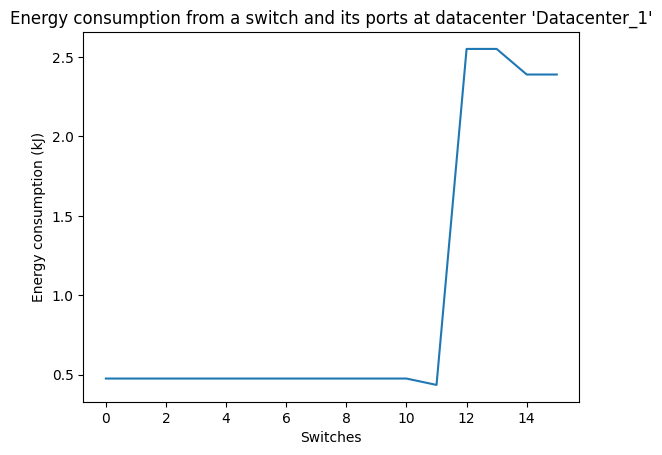

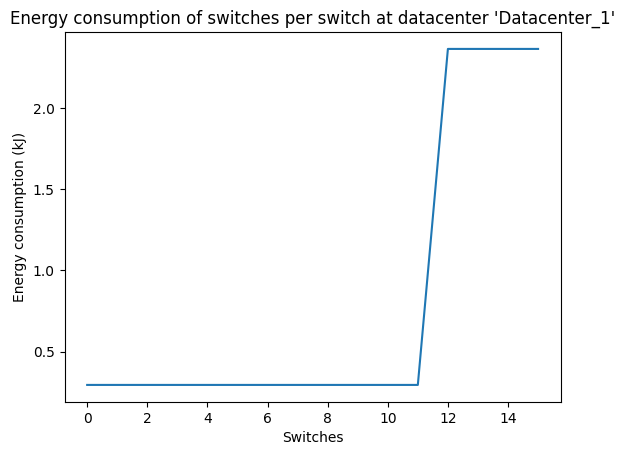

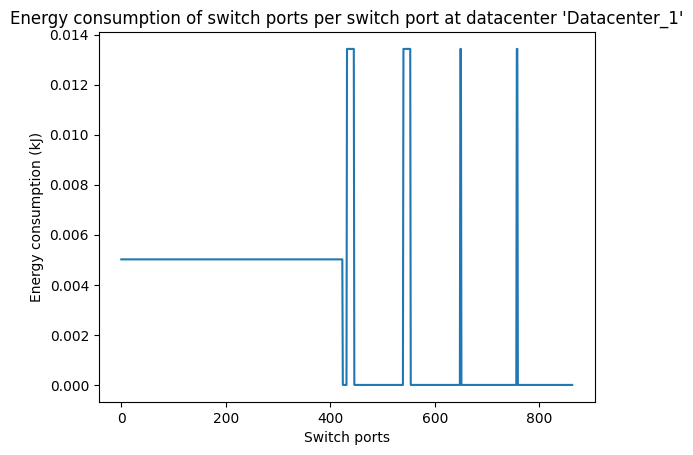

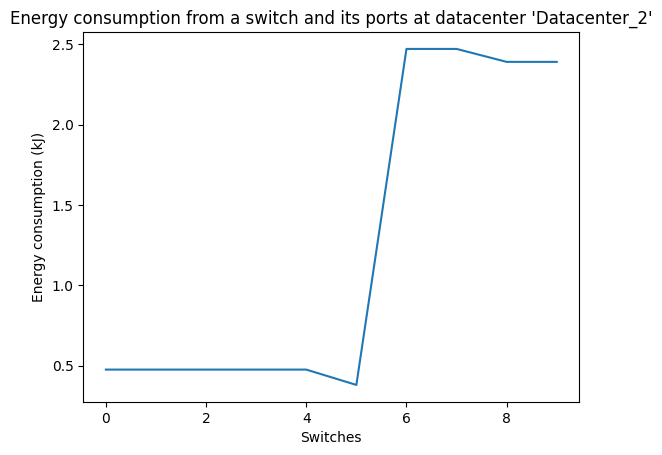

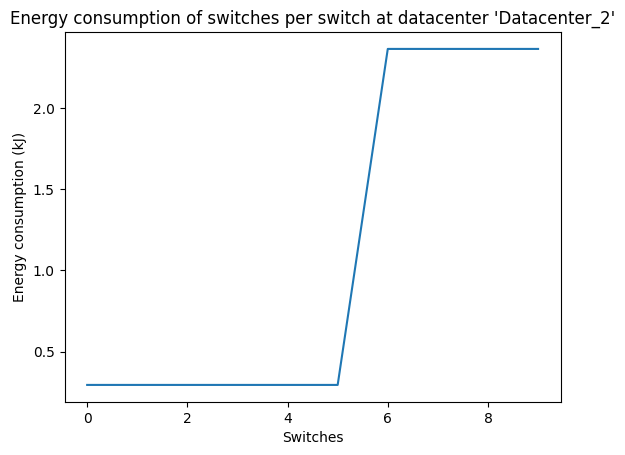

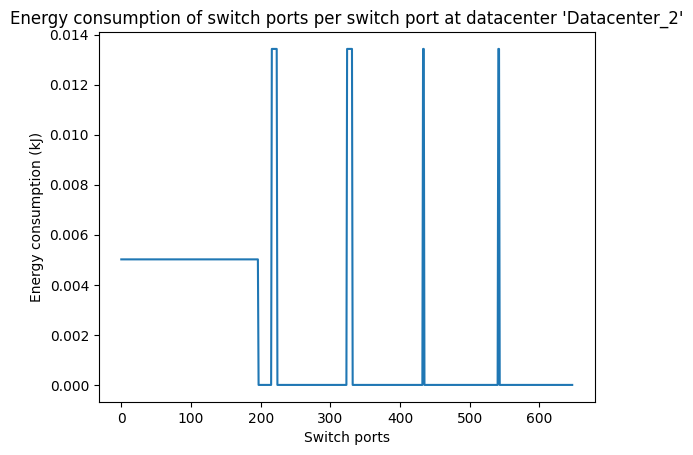

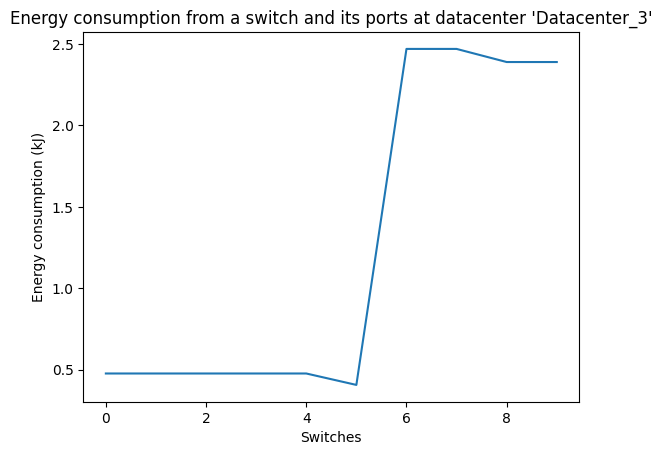

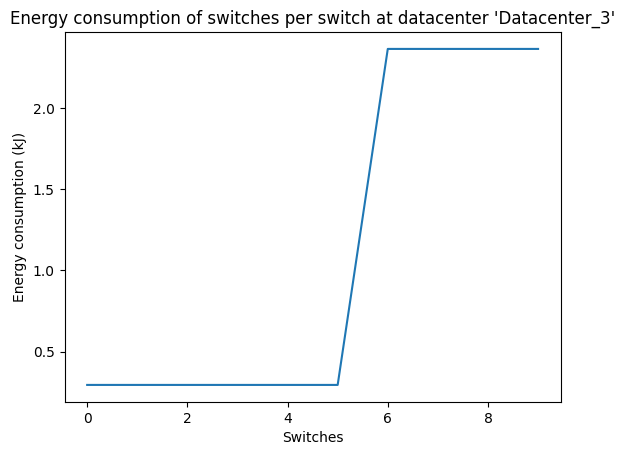

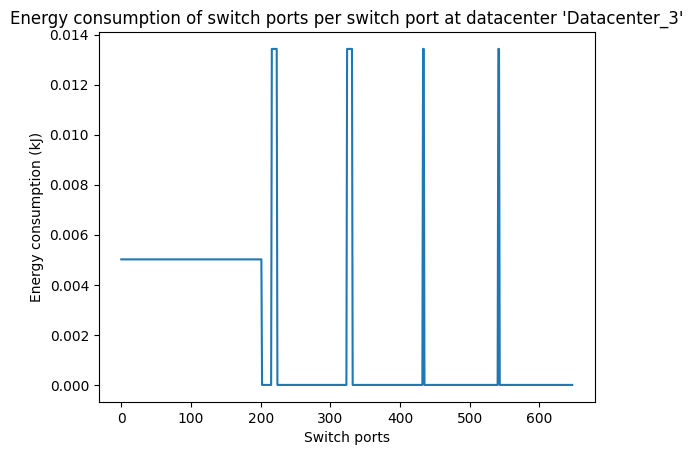

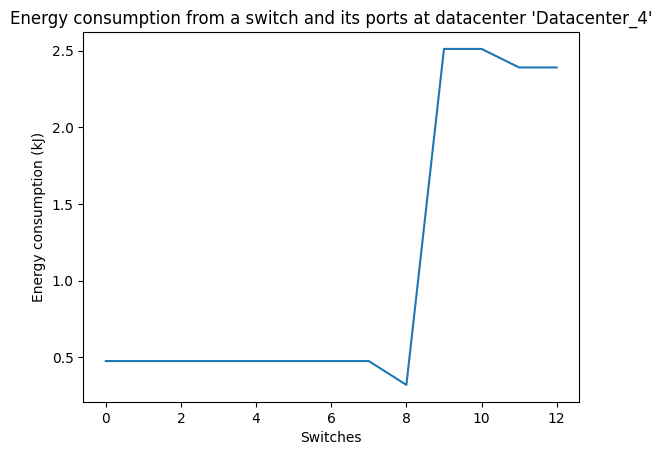

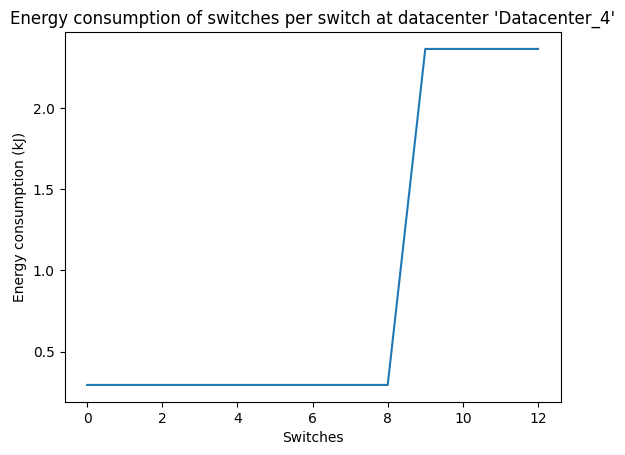

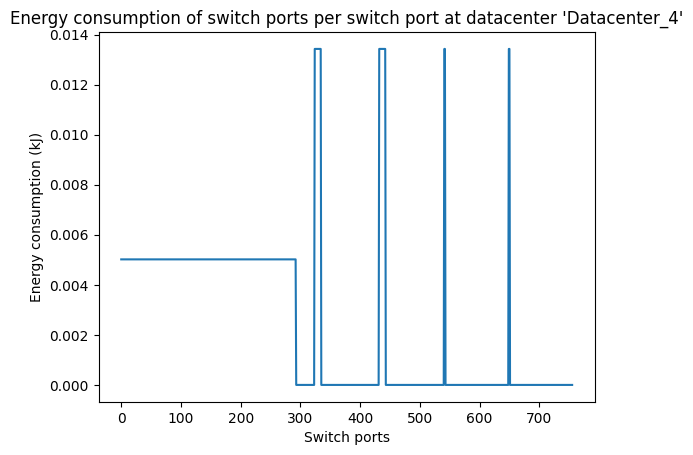

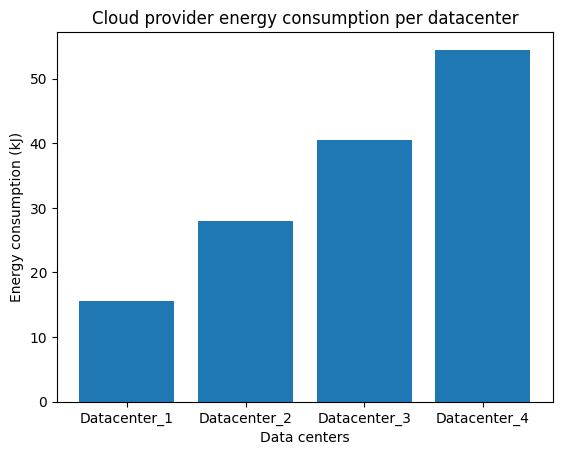

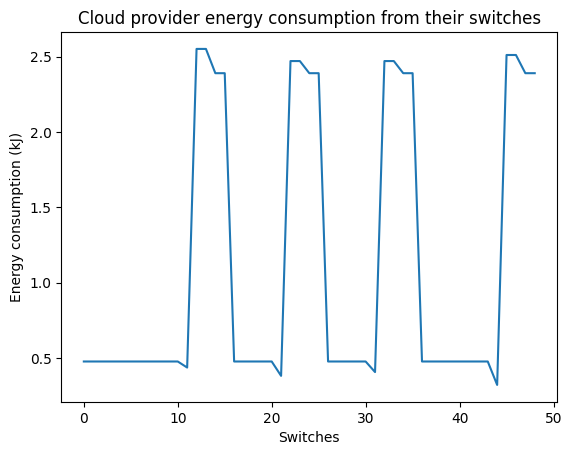

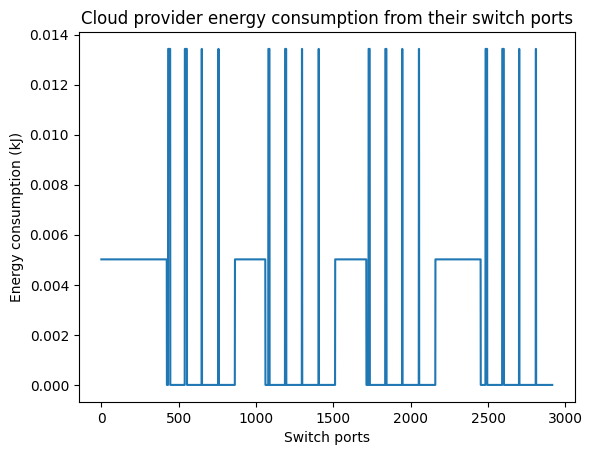

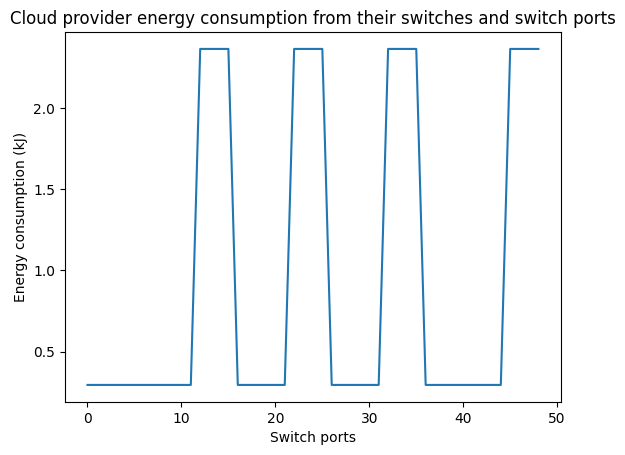

In [49]:
cloud_provider_current_over_duration_power_consumption_per_switch = np.array([])
cloud_provider_current_over_duration_power_consumption_per_switch_port = np.array([])
cloud_provider_current_over_duration_power_consumption_per_switch_combined = np.array([])
cloud_provider_current_over_duration_power_consumption_per_datacenter = np.array([])

datacenters_current_over_duration_power_consumption_per_switch = []
for datacenter_name in labels:
    datacenter_current_over_duration_power_consumption_per_switch = np.array([])
    datacenter_current_over_duration_power_consumption_per_switch_port = np.array([])
    datacenter_current_over_duration_power_consumption_per_switch_combined = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        power_consumption = 0
        
        if sample['is_active'] == False:
            cloud_provider_current_over_duration_power_consumption_per_switch = np.append(cloud_provider_current_over_duration_power_consumption_per_switch, 0)
            datacenter_current_over_duration_power_consumption_per_switch = np.append(datacenter_current_over_duration_power_consumption_per_switch, 0)
        else:
            device_power = ((simulation_duration - sample['active_duration']) * sample['low_power']) + (sample['active_duration'] * sample['high_power'])
            power_consumption += device_power
            cloud_provider_current_over_duration_power_consumption_per_switch = np.append(cloud_provider_current_over_duration_power_consumption_per_switch, device_power)
            datacenter_current_over_duration_power_consumption_per_switch = np.append(datacenter_current_over_duration_power_consumption_per_switch, device_power)
        
        # elif sample['total_used_bandwidth'] == 0:
        #     power_consumption += sample['low_power']
        #     cloud_provider_current_over_duration_power_consumption_per_switch = np.append(cloud_provider_current_over_duration_power_consumption_per_switch, sample['low_power'])
        #     datacenter_current_over_duration_power_consumption_per_switch = np.append(datacenter_current_over_duration_power_consumption_per_switch, sample['low_power'])
        # else:
        #     power_consumption += sample['high_power']
        #     cloud_provider_current_over_duration_power_consumption_per_switch = np.append(cloud_provider_current_over_duration_power_consumption_per_switch, sample['high_power'])
        #     datacenter_current_over_duration_power_consumption_per_switch = np.append(datacenter_current_over_duration_power_consumption_per_switch, sample['high_power'])
        
        # ports: id, is_active,active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
        if pd.notna(sample['ports']):
            for port in sample['ports'].split(":"):
                port_info = port.split(",")
                if len(port_info) > 1:
                    if port_info[1].lower() == "true":
                        port_power = sample['power_per_port'] * simulation_duration
                        cloud_provider_current_over_duration_power_consumption_per_switch_port = np.append(cloud_provider_current_over_duration_power_consumption_per_switch_port, port_power)
                        datacenter_current_over_duration_power_consumption_per_switch_port = np.append(datacenter_current_over_duration_power_consumption_per_switch_port, port_power)
                        power_consumption += port_power
                    else:
                        cloud_provider_current_over_duration_power_consumption_per_switch_port = np.append(cloud_provider_current_over_duration_power_consumption_per_switch_port, 0)
                        datacenter_current_over_duration_power_consumption_per_switch_port = np.append(datacenter_current_over_duration_power_consumption_per_switch_port, 0)
                # else:
                #     switchports_powered_off += 1
        
        cloud_provider_current_over_duration_power_consumption_per_switch_combined = np.append(cloud_provider_current_over_duration_power_consumption_per_switch_combined, power_consumption)
        datacenter_current_over_duration_power_consumption_per_switch_combined = np.append(datacenter_current_over_duration_power_consumption_per_switch_combined, power_consumption)
    cloud_provider_current_over_duration_power_consumption_per_datacenter = np.append(cloud_provider_current_over_duration_power_consumption_per_datacenter, np.sum(cloud_provider_current_over_duration_power_consumption_per_switch_combined))
    datacenters_current_over_duration_power_consumption_per_switch.append(datacenter_current_over_duration_power_consumption_per_switch_combined)
    
    plt.plot(np.arange(len(datacenter_current_over_duration_power_consumption_per_switch_combined)), (datacenter_current_over_duration_power_consumption_per_switch_combined / 1000), label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption from a switch and its ports at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_over_duration_power_consumption_per_switch)), (datacenter_current_over_duration_power_consumption_per_switch / 1000), label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switches per switch at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_over_duration_power_consumption_per_switch_port)), (datacenter_current_over_duration_power_consumption_per_switch_port / 1000), label="Energy consumption")
    plt.xlabel("Switch ports")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switch ports per switch port at datacenter '{datacenter_name}'")
    plt.show()

plt.bar(np.arange(len(cloud_provider_current_over_duration_power_consumption_per_datacenter)), (cloud_provider_current_over_duration_power_consumption_per_datacenter / 1000), label="Energy consumption")
plt.xticks(np.arange(len(cloud_provider_current_over_duration_power_consumption_per_datacenter)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_over_duration_power_consumption_per_switch_combined)), (cloud_provider_current_over_duration_power_consumption_per_switch_combined / 1000), label="Energy consumption")
plt.xlabel("Switches")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_over_duration_power_consumption_per_switch_port)), (cloud_provider_current_over_duration_power_consumption_per_switch_port / 1000), label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switch ports")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_over_duration_power_consumption_per_switch)), (cloud_provider_current_over_duration_power_consumption_per_switch / 1000), label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches and switch ports")
plt.show()

### Reducing Energy Consumption

Reducing energy consumption by powering down ports

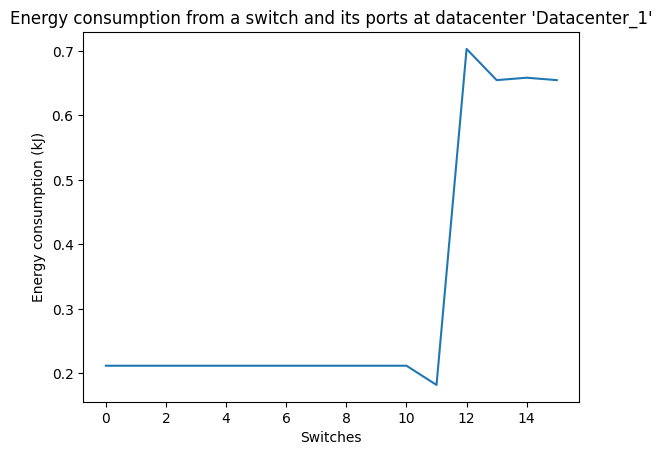

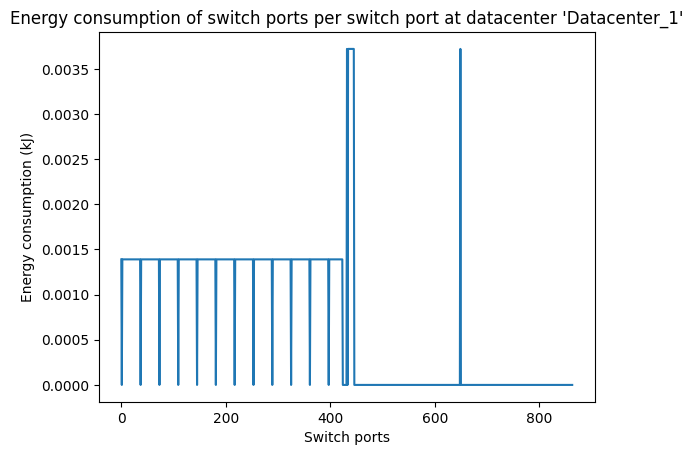

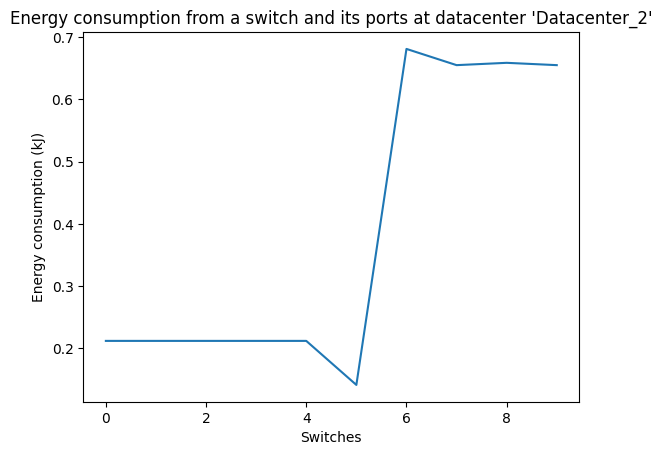

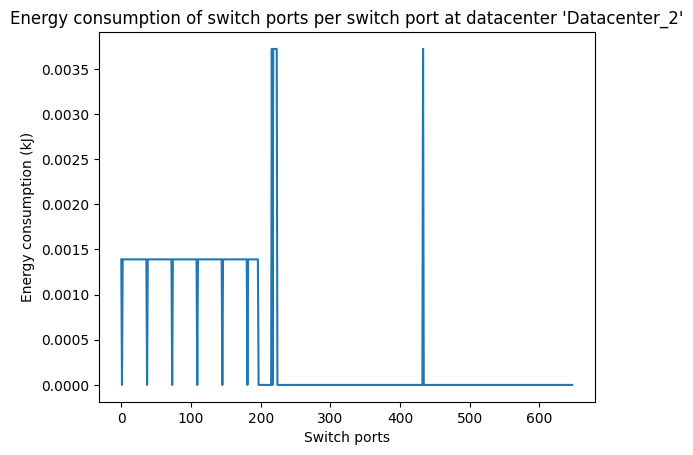

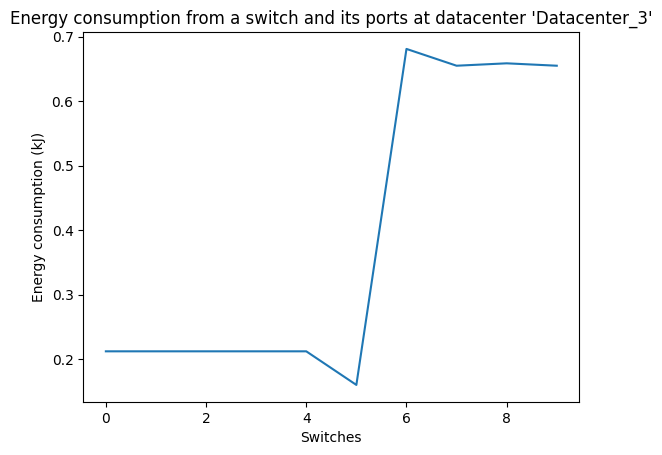

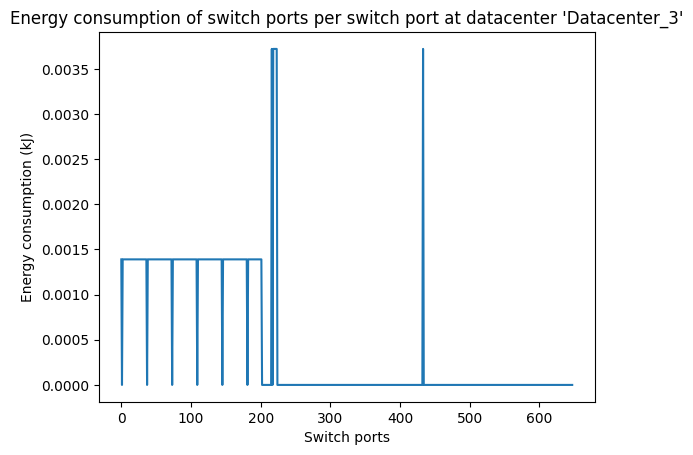

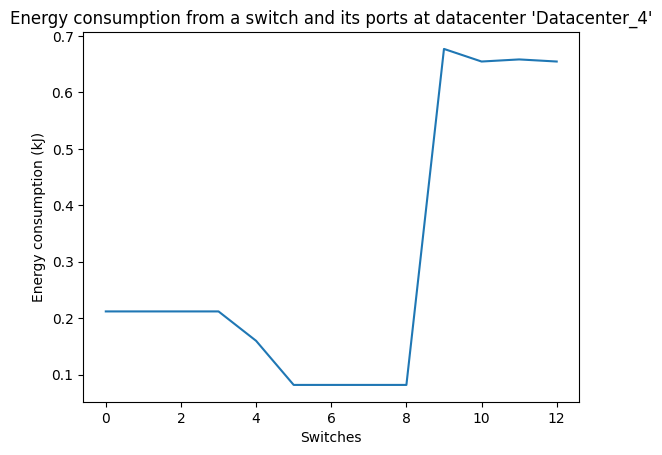

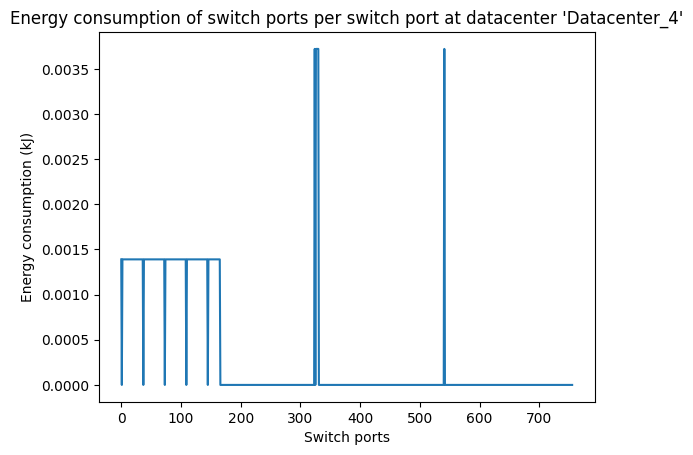

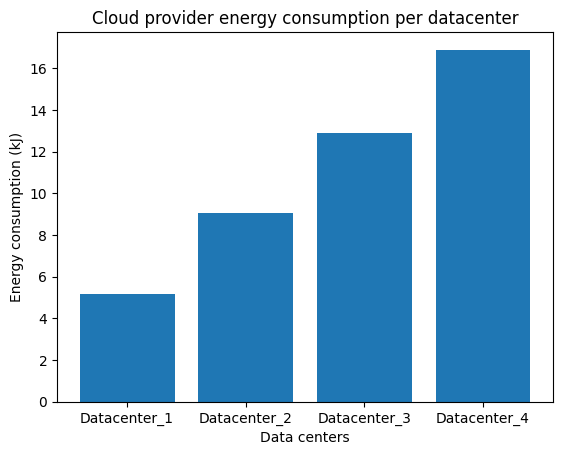

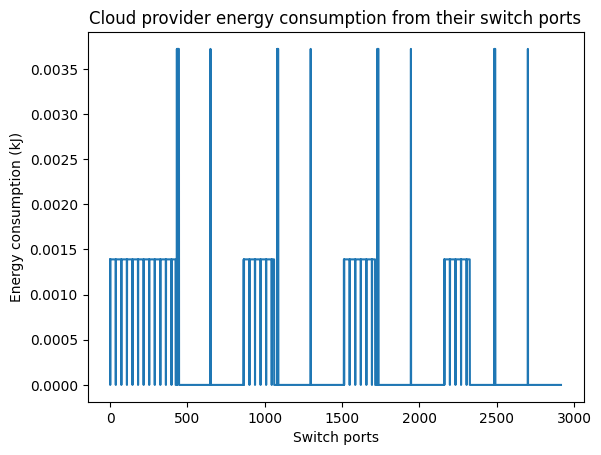

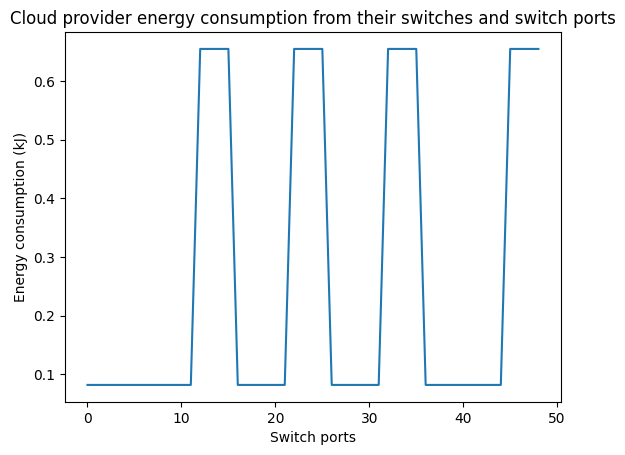

In [50]:
cloud_provider_current_state_power_consumption_per_switch_power_down_ports = np.array([])
cloud_provider_current_state_power_consumption_per_switch_port_power_down_ports = np.array([])
cloud_provider_current_state_power_consumption_per_switch_combined_power_down_ports = np.array([])
cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports = np.array([])

datacenter_power_down_ports_available_bw = np.array([])
datacenter_power_down_ports_power = np.array([])

datacenter_switches_power_down_ports_powered_on = np.array([])
datacenter_switches_power_down_ports_powered_off = np.array([])
datacenter_switchports_power_down_ports_powered_on = np.array([])
datacenter_switchports_power_down_ports_powered_off = np.array([])

datacenters_current_state_power_consumption_per_switch_power_down_ports = []
for datacenter_name in labels:
    datacenter_current_state_power_consumption_per_switch_power_down_ports = np.array([])
    datacenter_current_state_power_consumption_per_switch_port_power_down_ports = np.array([])
    datacenter_current_state_power_consumption_per_switch_combined_power_down_ports = np.array([])
    
    bw = 0
    
    switches_powered_on = 0
    switches_powered_off = 0
    switchports_powered_on = 0
    switchports_powered_off = 0
    
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        power_consumption = 0
        temp_bw = 0
        
        if sample['is_active'] == False:
            cloud_provider_current_state_power_consumption_per_switch_power_down_ports = np.append(cloud_provider_current_state_power_consumption_per_switch_power_down_ports, 0)
            datacenter_current_state_power_consumption_per_switch_power_down_ports = np.append(datacenter_current_state_power_consumption_per_switch_power_down_ports, 0)
            switches_powered_off += 1
            temp_bw = sample['bandwidth']
        elif sample['total_used_bandwidth'] == 0:
            power_consumption += sample['low_power']
            cloud_provider_current_state_power_consumption_per_switch_power_down_ports = np.append(cloud_provider_current_state_power_consumption_per_switch_power_down_ports, sample['low_power'])
            datacenter_current_state_power_consumption_per_switch_power_down_ports = np.append(datacenter_current_state_power_consumption_per_switch_power_down_ports, sample['low_power'])
            
            switches_powered_on += 1
            if sample['total_used_bandwidth'] > sample['bandwidth']:
                temp_bw = sample['bandwidth']
            else:
                temp_bw = sample['total_used_bandwidth']
        else:
            power_consumption += sample['high_power']
            cloud_provider_current_state_power_consumption_per_switch_power_down_ports = np.append(cloud_provider_current_state_power_consumption_per_switch_power_down_ports, sample['high_power'])
            datacenter_current_state_power_consumption_per_switch_power_down_ports = np.append(datacenter_current_state_power_consumption_per_switch_power_down_ports, sample['high_power'])
            
            switches_powered_on += 1
            if sample['total_used_bandwidth'] > sample['bandwidth']:
                temp_bw = sample['bandwidth']
            else:
                temp_bw = sample['total_used_bandwidth']
                
        
        # If a port is unused rather than having still consume power when active it is powered down
        # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
        if pd.notna(sample['ports']):
            for port in sample['ports'].split(":"):
                port_info = port.split(",")
                if len(port_info) > 1:
                    if port_info[1].lower() == "true" and float(port_info[6]) != 0:
                        cloud_provider_current_state_power_consumption_per_switch_port_power_down_ports = np.append(cloud_provider_current_state_power_consumption_per_switch_port_power_down_ports, sample['power_per_port'])
                        datacenter_current_state_power_consumption_per_switch_port_power_down_ports = np.append(datacenter_current_state_power_consumption_per_switch_port_power_down_ports, sample['power_per_port'])
                        power_consumption += power_per_port
                        switchports_powered_on += 1
                    else:
                        cloud_provider_current_state_power_consumption_per_switch_port_power_down_ports = np.append(cloud_provider_current_state_power_consumption_per_switch_port_power_down_ports, 0)
                        datacenter_current_state_power_consumption_per_switch_port_power_down_ports = np.append(datacenter_current_state_power_consumption_per_switch_port_power_down_ports, 0)
                        switchports_powered_off += 1
                        
                        if port_info[1].lower() == "true":
                            temp_bw += float(port_info[5])
                # else:
                #     switchports_powered_off += 1
        
        if temp_bw >= sample['bandwidth']:
            bw += 0
        else:
            bw += sample['bandwidth'] - temp_bw
        
        cloud_provider_current_state_power_consumption_per_switch_combined_power_down_ports = np.append(cloud_provider_current_state_power_consumption_per_switch_combined_power_down_ports, power_consumption)
        datacenter_current_state_power_consumption_per_switch_combined_power_down_ports = np.append(datacenter_current_state_power_consumption_per_switch_combined_power_down_ports, power_consumption)
    cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports = np.append(cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports, np.sum(cloud_provider_current_state_power_consumption_per_switch_combined_power_down_ports))
    datacenters_current_state_power_consumption_per_switch_power_down_ports.append(datacenter_current_state_power_consumption_per_switch_combined_power_down_ports)
    
    datacenter_power_down_ports_power = np.append(datacenter_power_down_ports_power, np.sum(datacenter_current_state_power_consumption_per_switch_combined_power_down_ports))
    datacenter_power_down_ports_available_bw = np.append(datacenter_power_down_ports_available_bw, bw)
    datacenter_switches_power_down_ports_powered_on = np.append(datacenter_switches_power_down_ports_powered_on, switches_powered_on)
    datacenter_switches_power_down_ports_powered_off = np.append(datacenter_switches_power_down_ports_powered_off, switches_powered_off)
    datacenter_switchports_power_down_ports_powered_on = np.append(datacenter_switchports_power_down_ports_powered_on, switchports_powered_on)
    datacenter_switchports_power_down_ports_powered_off = np.append(datacenter_switchports_power_down_ports_powered_off, switchports_powered_off)
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_combined_power_down_ports)), (datacenter_current_state_power_consumption_per_switch_combined_power_down_ports / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption from a switch and its ports at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_port_power_down_ports)), (datacenter_current_state_power_consumption_per_switch_port_power_down_ports / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switch ports")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switch ports per switch port at datacenter '{datacenter_name}'")
    plt.show()

plt.bar(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports)), (cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports / 1000) * 1, label="Energy consumption")
plt.xticks(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_port_power_down_ports)), (cloud_provider_current_state_power_consumption_per_switch_port_power_down_ports / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switch ports")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_power_down_ports)), (cloud_provider_current_state_power_consumption_per_switch_power_down_ports / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches and switch ports")
plt.show()

Reducing energy consumption by power down switches

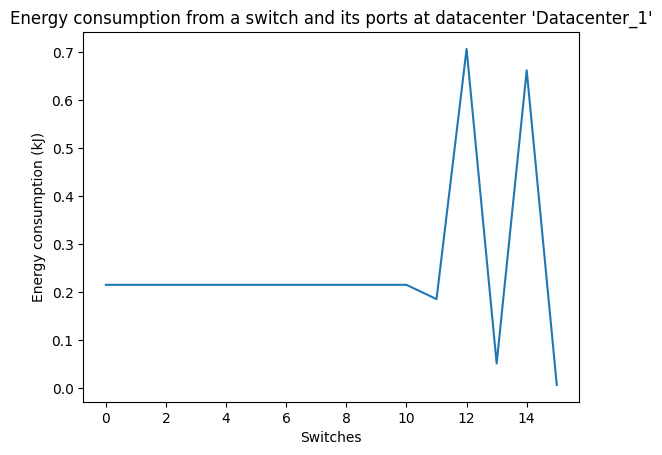

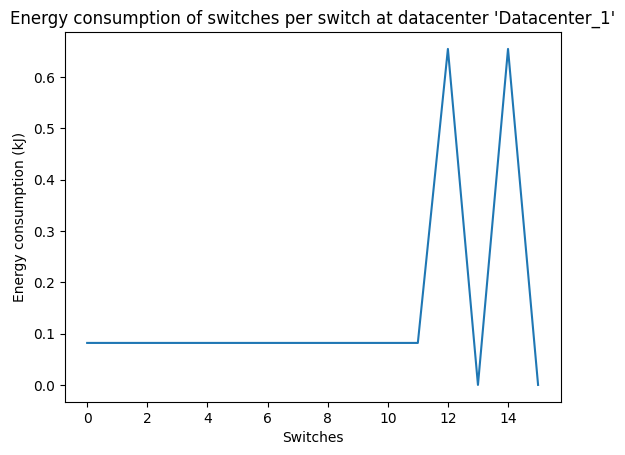

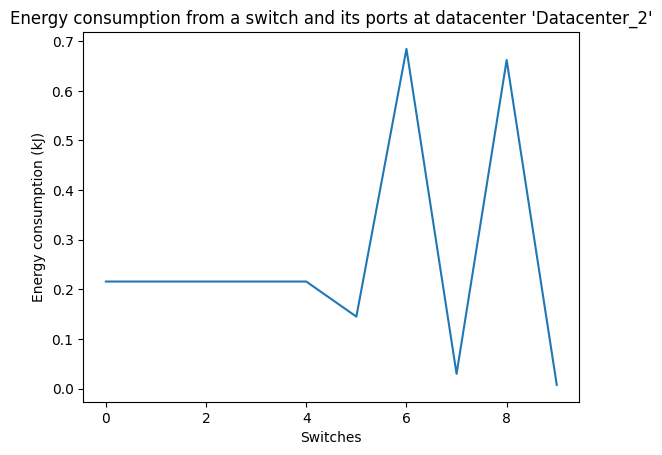

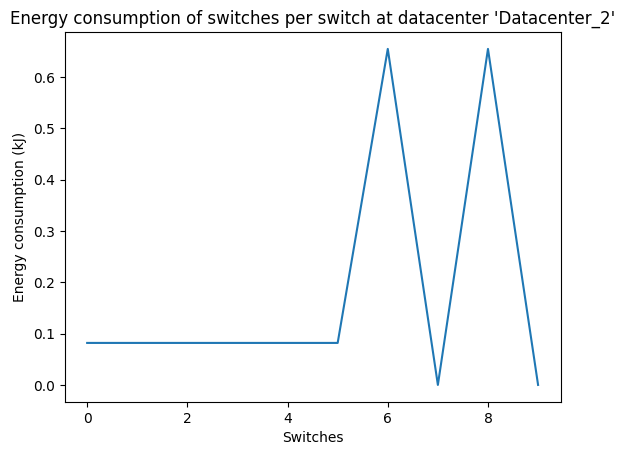

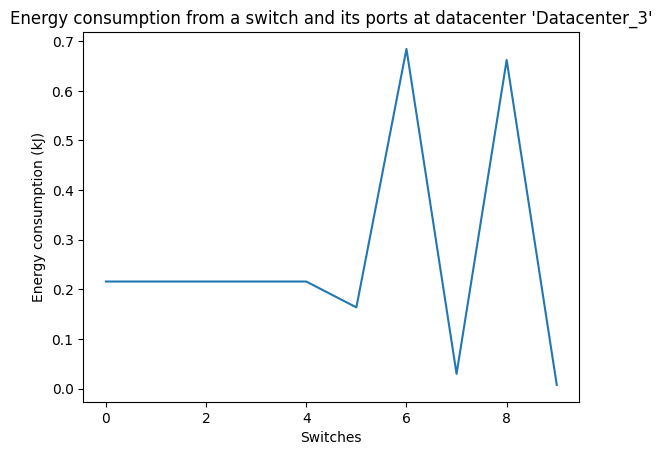

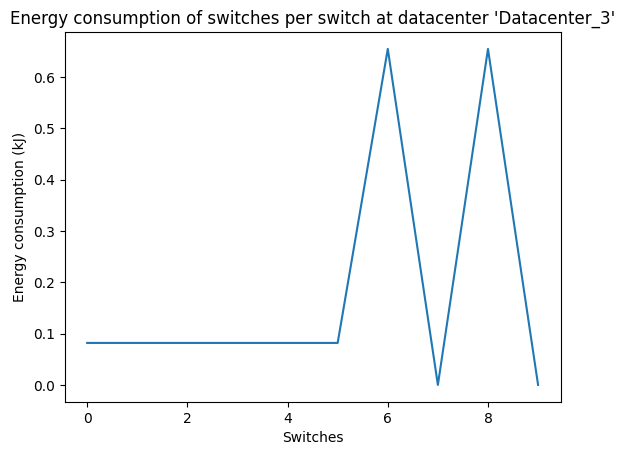

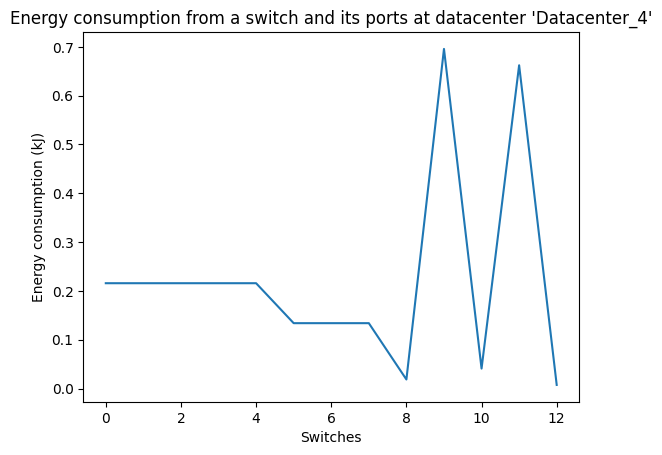

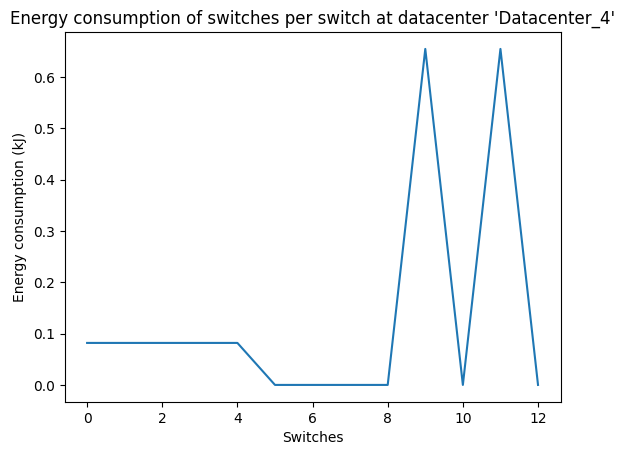

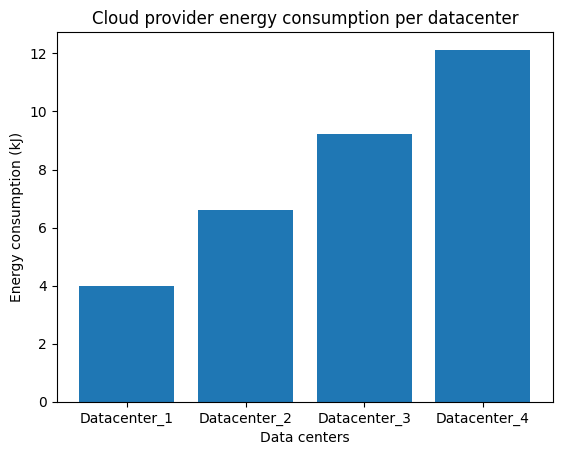

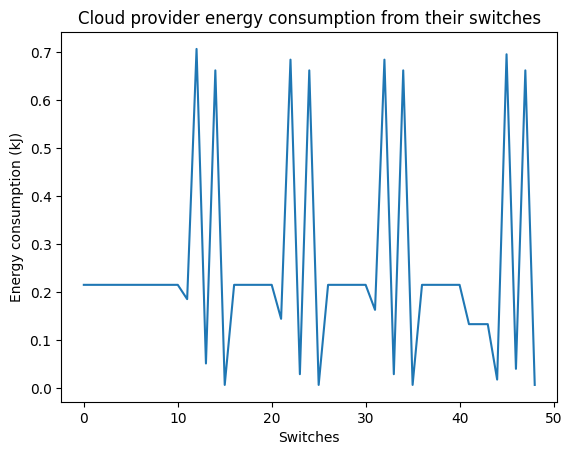

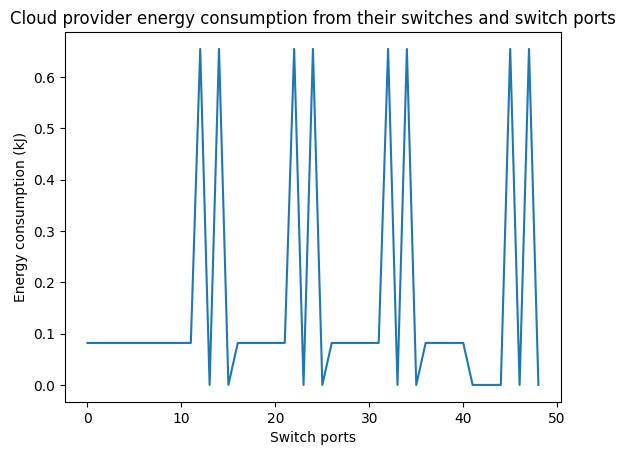

In [51]:
labels = np.unique(dataset['datacenter_name'])

cloud_provider_current_state_power_consumption_per_switch_power_down_switches = np.array([])
cloud_provider_current_state_power_consumption_per_switch_port_power_down_switches = np.array([])
cloud_provider_current_state_power_consumption_per_switch_combined_power_down_switches = np.array([])
cloud_provider_current_state_power_consumption_per_datacenter_power_down_switches = np.array([])

datacenter_power_down_switches_available_bw = np.array([])
datacenter_power_down_switches_power = np.array([])

datacenter_switches_power_down_switches_powered_on = np.array([])
datacenter_switches_power_down_switches_powered_off = np.array([])
datacenter_switchports_power_down_switches_powered_on = np.array([])
datacenter_switchports_power_down_switches_powered_off = np.array([])

datacenters_current_state_power_consumption_per_switch_power_down_switches = []
for datacenter_name in labels:
    datacenter_current_state_power_consumption_per_switch_power_down_switches = np.array([])
    datacenter_current_state_power_consumption_per_switch_port_power_down_switches = np.array([])
    datacenter_current_state_power_consumption_per_switch_combined_power_down_switches = np.array([])
    
    switches_powered_on = 0
    switches_powered_off = 0
    switchports_powered_on = 0
    switchports_powered_off = 0
    
    bw = 0
    
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        power_consumption = 0
        temp_bw = 0
        
        # If switch is unused rather than having it be idle when active it is powered down
        if sample['is_active'] == False or sample['total_used_bandwidth'] == 0:
            cloud_provider_current_state_power_consumption_per_switch_power_down_switches = np.append(cloud_provider_current_state_power_consumption_per_switch_power_down_switches, 0)
            datacenter_current_state_power_consumption_per_switch_power_down_switches = np.append(datacenter_current_state_power_consumption_per_switch_power_down_switches, 0)
            switches_powered_off += 1
            temp_bw = sample['bandwidth']
        else:
            power_consumption += sample['high_power']
            cloud_provider_current_state_power_consumption_per_switch_power_down_switches = np.append(cloud_provider_current_state_power_consumption_per_switch_power_down_switches, sample['high_power'])
            datacenter_current_state_power_consumption_per_switch_power_down_switches = np.append(datacenter_current_state_power_consumption_per_switch_power_down_switches, sample['high_power'])
            
            switches_powered_on += 1
            if sample['total_used_bandwidth'] < sample['bandwidth']:
                temp_bw = sample['total_used_bandwidth']
            else:
                temp_bw = sample['bandwidth']
        
        # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
        if pd.notna(sample['ports']):
            for port in sample['ports'].split(":"):
                port_info = port.split(",")
                if len(port_info) > 1:
                    if port_info[1].lower() == "true":
                        cloud_provider_current_state_power_consumption_per_switch_port_power_down_switches = np.append(cloud_provider_current_state_power_consumption_per_switch_port_power_down_switches, sample['power_per_port'])
                        datacenter_current_state_power_consumption_per_switch_port_power_down_switches = np.append(datacenter_current_state_power_consumption_per_switch_port_power_down_switches, sample['power_per_port'])
                        power_consumption += power_per_port
                        switchports_powered_on += 1
                    else:
                        cloud_provider_current_state_power_consumption_per_switch_port_power_down_switches = np.append(cloud_provider_current_state_power_consumption_per_switch_port_power_down_switches, 0)
                        datacenter_current_state_power_consumption_per_switch_port_power_down_switches = np.append(datacenter_current_state_power_consumption_per_switch_port_power_down_switches, 0)
                        switchports_powered_off += 1
                # else:
                #     switchports_powered_off += 1
        
        if temp_bw >= sample['bandwidth']:
            bw += 0
        else:
            bw += sample['bandwidth'] - temp_bw
        
        cloud_provider_current_state_power_consumption_per_switch_combined_power_down_switches = np.append(cloud_provider_current_state_power_consumption_per_switch_combined_power_down_switches, power_consumption)
        datacenter_current_state_power_consumption_per_switch_combined_power_down_switches = np.append(datacenter_current_state_power_consumption_per_switch_combined_power_down_switches, power_consumption)
    cloud_provider_current_state_power_consumption_per_datacenter_power_down_switches = np.append(cloud_provider_current_state_power_consumption_per_datacenter_power_down_switches, np.sum(cloud_provider_current_state_power_consumption_per_switch_combined_power_down_switches))
    datacenters_current_state_power_consumption_per_switch_power_down_switches.append(datacenter_current_state_power_consumption_per_switch_combined_power_down_switches)
    
    datacenter_power_down_switches_power = np.append(datacenter_power_down_switches_power, np.sum(datacenter_current_state_power_consumption_per_switch_combined_power_down_switches))
    
    datacenter_power_down_switches_available_bw = np.append(datacenter_power_down_switches_available_bw, bw)
    datacenter_switches_power_down_switches_powered_on = np.append(datacenter_switches_power_down_switches_powered_on, switches_powered_on)
    datacenter_switches_power_down_switches_powered_off = np.append(datacenter_switches_power_down_switches_powered_off, switches_powered_off)
    datacenter_switchports_power_down_switches_powered_on = np.append(datacenter_switchports_power_down_switches_powered_on, switchports_powered_on)
    datacenter_switchports_power_down_switches_powered_off = np.append(datacenter_switchports_power_down_switches_powered_off, switchports_powered_off)
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_combined_power_down_switches)), (datacenter_current_state_power_consumption_per_switch_combined_power_down_switches / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption from a switch and its ports at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_power_down_switches)), (datacenter_current_state_power_consumption_per_switch_power_down_switches / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switches per switch at datacenter '{datacenter_name}'")
    plt.show()

plt.bar(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter_power_down_switches)), (cloud_provider_current_state_power_consumption_per_datacenter_power_down_switches / 1000) * 1, label="Energy consumption")
plt.xticks(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter_power_down_switches)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_combined_power_down_switches)), (cloud_provider_current_state_power_consumption_per_switch_combined_power_down_switches / 1000) * 1, label="Energy consumption")
plt.xlabel("Switches")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_power_down_switches)), (cloud_provider_current_state_power_consumption_per_switch_power_down_switches / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches and switch ports")
plt.show()

Reducing energy consumption by powering down unused switches and ports.

Switches powered down at datacenter 'Datacenter_1': 0
Ports powered down with powered switch at datacenter 'Datacenter_1': 222
Ports powered down at datacenter 'Datacenter_1': 438


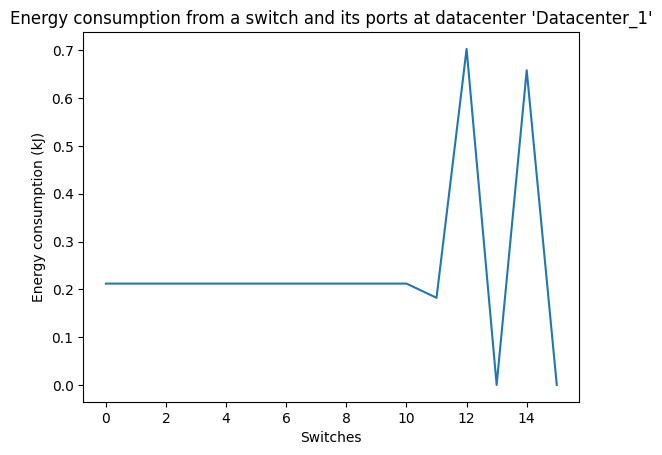

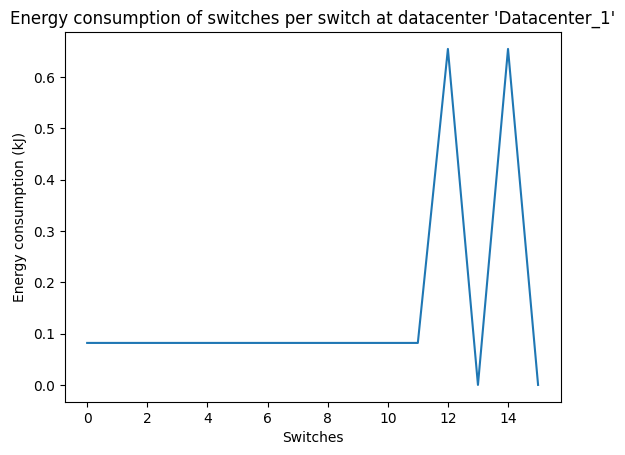

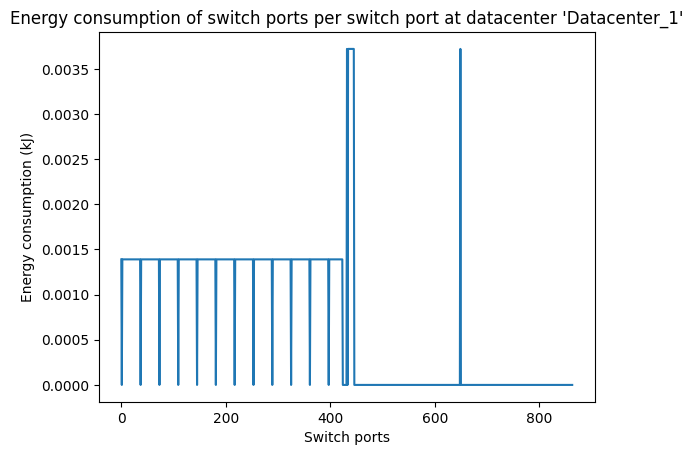

Switches powered down at datacenter 'Datacenter_2': 0
Ports powered down with powered switch at datacenter 'Datacenter_2': 233
Ports powered down at datacenter 'Datacenter_2': 449


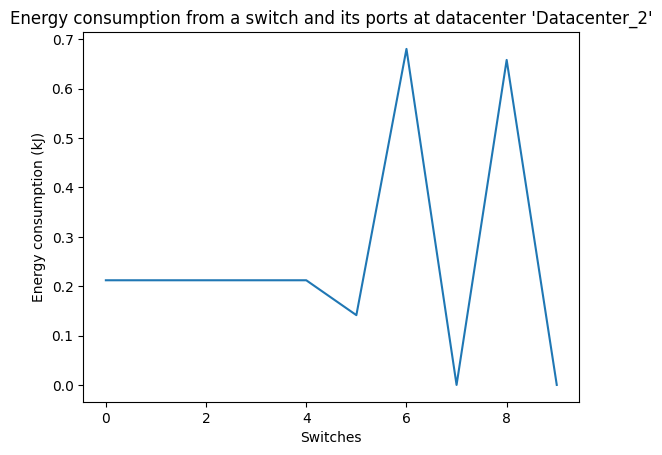

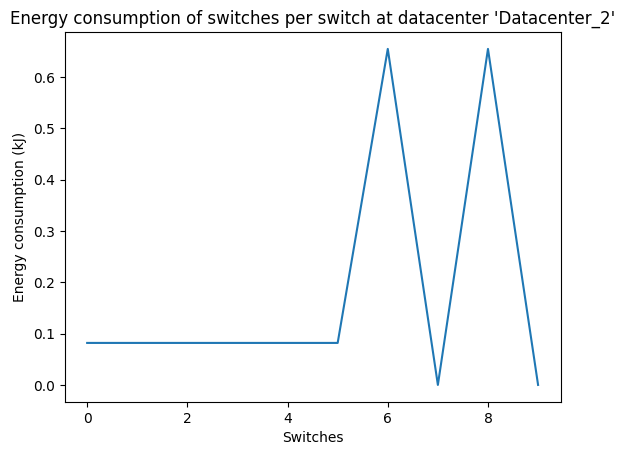

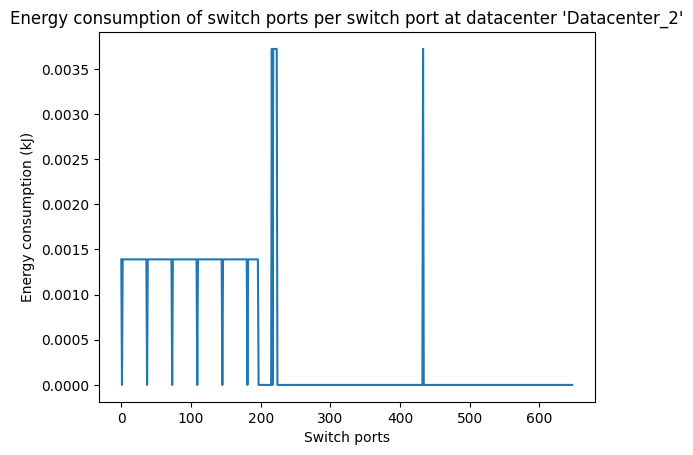

Switches powered down at datacenter 'Datacenter_3': 0
Ports powered down with powered switch at datacenter 'Datacenter_3': 228
Ports powered down at datacenter 'Datacenter_3': 444


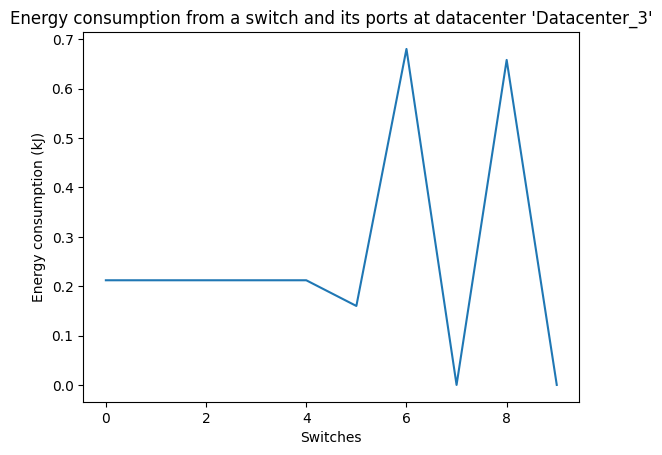

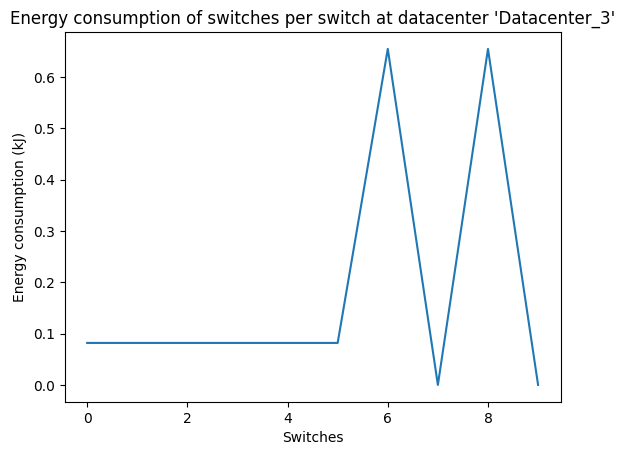

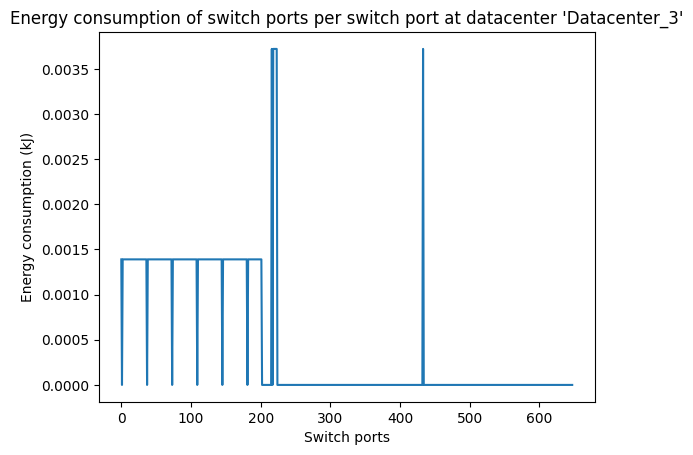

Switches powered down at datacenter 'Datacenter_4': 0
Ports powered down with powered switch at datacenter 'Datacenter_4': 228
Ports powered down at datacenter 'Datacenter_4': 588


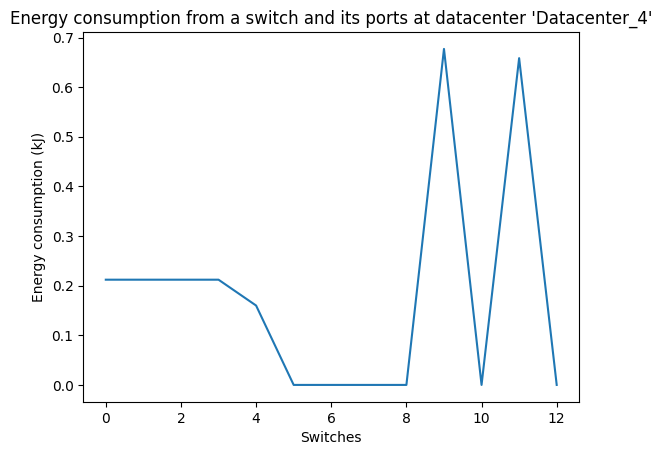

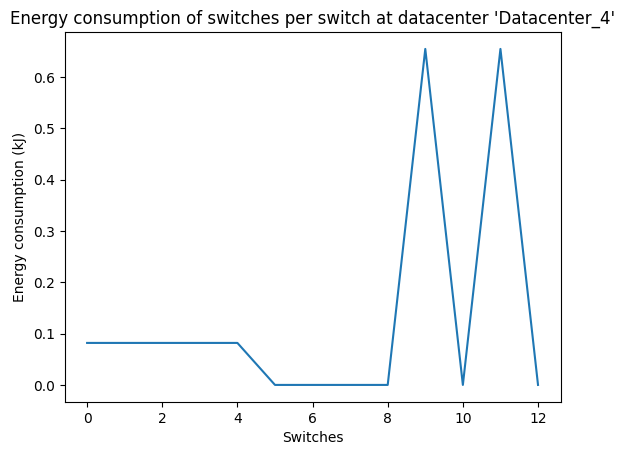

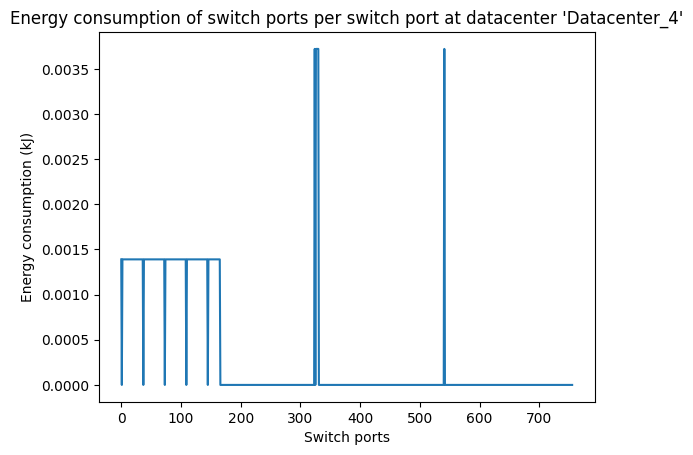

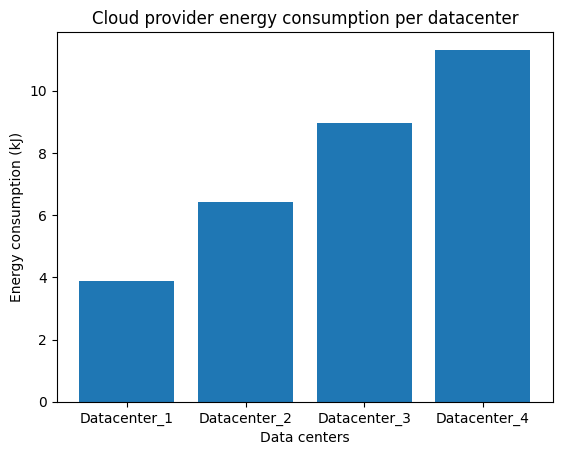

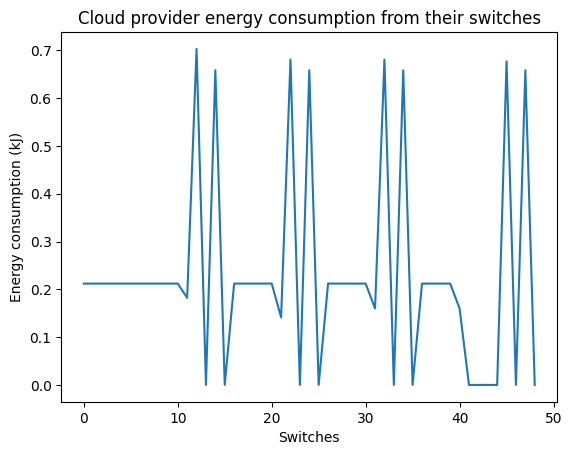

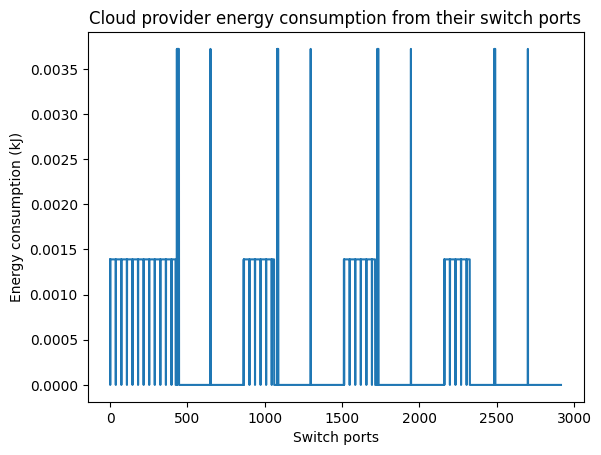

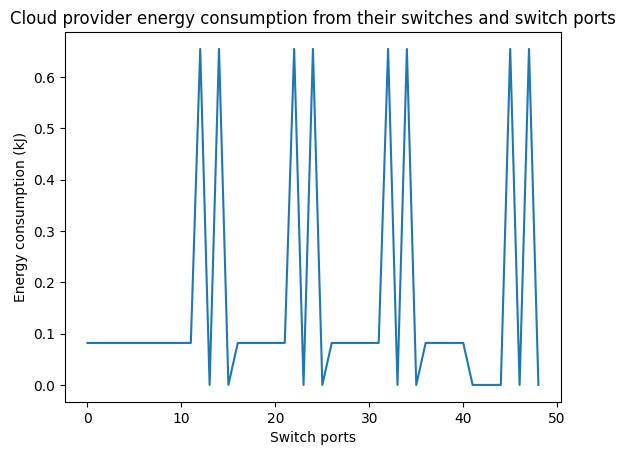

Switches powered down: 0
Ports powered down with powered switch: 911
Ports powered down: 1919


In [52]:
cloud_provider_current_state_power_consumption_per_switch_power_down_both = np.array([])
cloud_provider_current_state_power_consumption_per_switch_port_power_down_both = np.array([])
cloud_provider_current_state_power_consumption_per_switch_combined_power_down_both = np.array([])
cloud_provider_current_state_power_consumption_per_datacenter_power_down_both = np.array([])

datacenter_power_down_both_available_bw = np.array([])
datacenter_power_down_both_power = np.array([])

datacenter_switches_power_down_both_power = np.array([])
datacenter_switches_power_down_both_powered_on = np.array([])
datacenter_switches_power_down_both_powered_off = np.array([])
datacenter_switchports_power_down_both_powered_on = np.array([])
datacenter_switchports_power_down_both_powered_off = np.array([])

datacenters_current_state_power_consumption_per_switch_power_down_both = []
switches_powered_down = 0
ports_powered_down = 0
ports_powered_down_with_powered_switch = 0
for datacenter_name in labels:
    datacenter_current_state_power_consumption_per_switch_power_down_both = np.array([])
    datacenter_current_state_power_consumption_per_switch_port_power_down_both = np.array([])
    datacenter_current_state_power_consumption_per_switch_combined_power_down_both = np.array([])
    
    switches_powered_down_per_datacenter = 0
    ports_powered_down_per_datacenter = 0
    ports_powered_down_with_powered_switch_per_datacenter = 0
    
    bw = 0
    
    switches_powered_on = 0
    switches_powered_off = 0
    switchports_powered_on = 0
    switchports_powered_off = 0
    
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        power_consumption = 0
        temp_bw = 0
        could_be_powered_down = False
        # If switch is unused rather than having it be idle when active it is powered down
        if sample['is_active'] == False or sample['total_used_bandwidth'] == 0:
            cloud_provider_current_state_power_consumption_per_switch_power_down_both = np.append(cloud_provider_current_state_power_consumption_per_switch_power_down_both, 0)
            datacenter_current_state_power_consumption_per_switch_power_down_both = np.append(datacenter_current_state_power_consumption_per_switch_power_down_both, 0)
            switches_powered_off += 1
            could_be_powered_down = True
            temp_bw = sample['bandwidth']
        elif sample['total_used_bandwidth'] == 0:
            cloud_provider_current_state_power_consumption_per_switch_power_down_both = np.append(cloud_provider_current_state_power_consumption_per_switch_power_down_both, 0)
            datacenter_current_state_power_consumption_per_switch_power_down_both = np.append(datacenter_current_state_power_consumption_per_switch_power_down_both, 0)
            switches_powered_down += 1
            switches_powered_down_per_datacenter += 1
            could_be_powered_down = True
            
            switches_powered_off += 1
            temp_bw = sample['bandwidth']
        else:
            power_consumption += sample['high_power']
            cloud_provider_current_state_power_consumption_per_switch_power_down_both = np.append(cloud_provider_current_state_power_consumption_per_switch_power_down_both, sample['high_power'])
            datacenter_current_state_power_consumption_per_switch_power_down_both = np.append(datacenter_current_state_power_consumption_per_switch_power_down_both, sample['high_power'])
            
            switches_powered_on += 1
            if sample['total_used_bandwidth'] > sample['bandwidth']:
                temp_bw = sample['bandwidth']
            else:
                temp_bw = sample['total_used_bandwidth']
        
        # If a port is unused rather than having still consume power when active it is powered down
        # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
        if pd.notna(sample['ports']):
            for port in sample['ports'].split(":"):
                port_info = port.split(",")
                if len(port_info) > 1:
                    if port_info[1].lower() == "true" and float(port_info[6]) != 0:
                        # print("----------")
                        # print(port_info[1].lower())
                        # print(port_info[1])
                        # print(port_info[6])
                        cloud_provider_current_state_power_consumption_per_switch_port_power_down_both = np.append(cloud_provider_current_state_power_consumption_per_switch_port_power_down_both, sample['power_per_port'])
                        datacenter_current_state_power_consumption_per_switch_port_power_down_both = np.append(datacenter_current_state_power_consumption_per_switch_port_power_down_both, sample['power_per_port'])
                        power_consumption += power_per_port
                        switchports_powered_on += 1
                    elif float(port_info[6]) == 0:
                        cloud_provider_current_state_power_consumption_per_switch_port_power_down_both = np.append(cloud_provider_current_state_power_consumption_per_switch_port_power_down_both, 0)
                        datacenter_current_state_power_consumption_per_switch_port_power_down_both = np.append(datacenter_current_state_power_consumption_per_switch_port_power_down_both, 0)
                        ports_powered_down += 1
                        ports_powered_down_per_datacenter += 1
                        if sample['is_active'] == True and sample['total_used_bandwidth'] != 0:
                            ports_powered_down_with_powered_switch += 1
                            ports_powered_down_with_powered_switch_per_datacenter += 1
                        
                        switchports_powered_off += 1
                        
                        if could_be_powered_down == False:
                            temp_bw += float(port_info[5])
                    else:
                        cloud_provider_current_state_power_consumption_per_switch_port_power_down_both = np.append(cloud_provider_current_state_power_consumption_per_switch_port_power_down_both, 0)
                        datacenter_current_state_power_consumption_per_switch_port_power_down_both = np.append(datacenter_current_state_power_consumption_per_switch_port_power_down_both, 0)
                        
                        switchports_powered_off += 1
                # else:
                #     switchports_powered_off += 1
        if temp_bw >= sample['bandwidth']:
            bw += 0
        else:
            bw += sample['bandwidth'] - temp_bw
        
        cloud_provider_current_state_power_consumption_per_switch_combined_power_down_both = np.append(cloud_provider_current_state_power_consumption_per_switch_combined_power_down_both, power_consumption)
        datacenter_current_state_power_consumption_per_switch_combined_power_down_both = np.append(datacenter_current_state_power_consumption_per_switch_combined_power_down_both, power_consumption)
    cloud_provider_current_state_power_consumption_per_datacenter_power_down_both = np.append(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both, np.sum(cloud_provider_current_state_power_consumption_per_switch_combined_power_down_both))
    datacenter_switches_power_down_both_power = np.append(datacenter_switches_power_down_both_power, np.sum(datacenter_current_state_power_consumption_per_switch_combined_power_down_both))
    datacenters_current_state_power_consumption_per_switch_power_down_both.append(datacenter_current_state_power_consumption_per_switch_combined_power_down_both)
    
    datacenter_power_down_both_available_bw = np.append(datacenter_power_down_both_available_bw, bw)
    datacenter_power_down_both_power = np.append(datacenter_power_down_both_power, np.sum(datacenter_current_state_power_consumption_per_switch_combined_power_down_both))
    
    datacenter_switches_power_down_both_powered_on = np.append(datacenter_switches_power_down_both_powered_on, switches_powered_on)
    datacenter_switches_power_down_both_powered_off = np.append(datacenter_switches_power_down_both_powered_off, switches_powered_off)
    datacenter_switchports_power_down_both_powered_on = np.append(datacenter_switchports_power_down_both_powered_on, switchports_powered_on)
    datacenter_switchports_power_down_both_powered_off = np.append(datacenter_switchports_power_down_both_powered_off, switchports_powered_off)
    
    print(f"Switches powered down at datacenter '{datacenter_name}':", switches_powered_down_per_datacenter)
    print(f"Ports powered down with powered switch at datacenter '{datacenter_name}':", ports_powered_down_with_powered_switch_per_datacenter)
    print(f"Ports powered down at datacenter '{datacenter_name}':", ports_powered_down_per_datacenter)
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_combined_power_down_both)), (datacenter_current_state_power_consumption_per_switch_combined_power_down_both / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption from a switch and its ports at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_power_down_both)), (datacenter_current_state_power_consumption_per_switch_power_down_both / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switches per switch at datacenter '{datacenter_name}'")
    plt.show()
    
    plt.plot(np.arange(len(datacenter_current_state_power_consumption_per_switch_port_power_down_both)), (datacenter_current_state_power_consumption_per_switch_port_power_down_both / 1000) * 1, label="Energy consumption")
    plt.xlabel("Switch ports")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption of switch ports per switch port at datacenter '{datacenter_name}'")
    plt.show()

plt.bar(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both)), (cloud_provider_current_state_power_consumption_per_datacenter_power_down_both / 1000) * 1, label="Energy consumption")
plt.xticks(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_combined_power_down_both)), (cloud_provider_current_state_power_consumption_per_switch_combined_power_down_both / 1000) * 1, label="Energy consumption")
plt.xlabel("Switches")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_port_power_down_both)), (cloud_provider_current_state_power_consumption_per_switch_port_power_down_both / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switch ports")
plt.show()

plt.plot(np.arange(len(cloud_provider_current_state_power_consumption_per_switch_power_down_both)), (cloud_provider_current_state_power_consumption_per_switch_power_down_both / 1000) * 1, label="Energy consumption")
plt.xlabel("Switch ports")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption from their switches and switch ports")
plt.show()

print("Switches powered down:", switches_powered_down)
print(f"Ports powered down with powered switch:", ports_powered_down_with_powered_switch)
print("Ports powered down:", ports_powered_down)

### Combine and Compare methods of reducing energy consumption

comparing approaches of reducing energy consumption with the current and maximum energy consumption of the cloud provider's network infrastructure. 

Saved energy consumption:
- Powering down switches 13.421760000000003kW/s
- Powering down ports 1.3429200000000137kW/s
- Powering down switches and ports 14.764680000000006kW/s


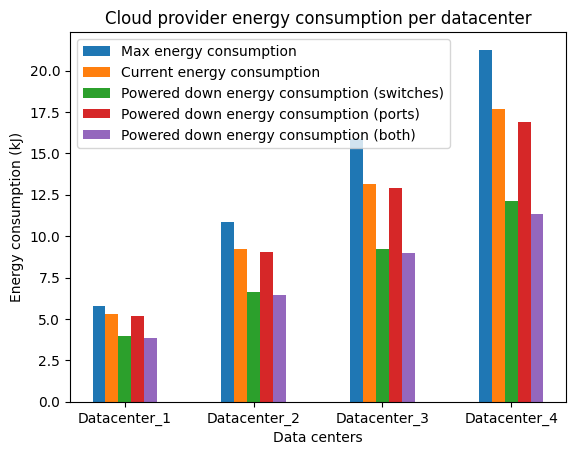

In [53]:
print(f"Saved energy consumption:")
print(f"- Powering down switches {np.sum(cloud_provider_current_state_power_consumption_per_datacenter)/1000 - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_switches)/1000}kW/s")
print(f"- Powering down ports {np.sum(cloud_provider_current_state_power_consumption_per_datacenter)/1000 - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports)/1000}kW/s")
print(f"- Powering down switches and ports {np.sum(cloud_provider_current_state_power_consumption_per_datacenter)/1000 - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both)/1000}kW/s")
x = np.arange(len(labels))
bar_width = 0.1
plt.bar(x - 0.2, (cloud_provider_max_power_consumption_per_datacenter / 1000) * 1, width=bar_width, label="Max energy consumption")
plt.bar(x - 0.1, (cloud_provider_current_state_power_consumption_per_datacenter / 1000) * 1, width=bar_width, label="Current energy consumption")
plt.bar(x, (cloud_provider_current_state_power_consumption_per_datacenter_power_down_switches / 1000) * 1, width=bar_width, label="Powered down energy consumption (switches)")
plt.bar(x + 0.1, (cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports / 1000) * 1, width=bar_width, label="Powered down energy consumption (ports)")
plt.bar(x + 0.2, (cloud_provider_current_state_power_consumption_per_datacenter_power_down_both / 1000) * 1, width=bar_width, label="Powered down energy consumption (both)")
plt.xticks(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.legend()
plt.show()

Saved energy consumption over the duration 3.6094s:
- Powering down switches 48.444500544000036kJ
- Powering down ports 4.847135448000046kJ
- Powering down switches and ports 53.29163599200005kJ


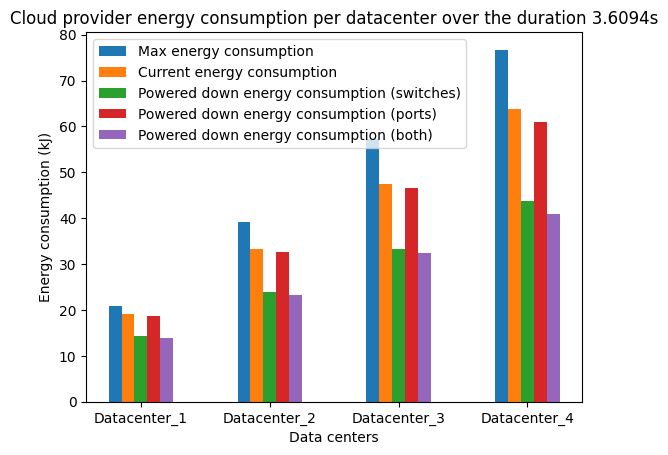

In [54]:
print(f"Saved energy consumption over the duration {simulation_duration}s:")
print(f"- Powering down switches {np.sum(cloud_provider_current_state_power_consumption_per_datacenter * simulation_duration)/1000 - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_switches * simulation_duration)/1000}kJ")
print(f"- Powering down ports {np.sum(cloud_provider_current_state_power_consumption_per_datacenter * simulation_duration)/1000 - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports * simulation_duration)/1000}kJ")
print(f"- Powering down switches and ports {np.sum(cloud_provider_current_state_power_consumption_per_datacenter * simulation_duration)/1000 - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both * simulation_duration)/1000}kJ")
x = np.arange(len(labels))
bar_width = 0.1
plt.bar(x - 0.2, (cloud_provider_max_power_consumption_per_datacenter / 1000) * simulation_duration, width=bar_width, label="Max energy consumption")
plt.bar(x - 0.1, (cloud_provider_current_state_power_consumption_per_datacenter / 1000) * simulation_duration, width=bar_width, label="Current energy consumption")
plt.bar(x, (cloud_provider_current_state_power_consumption_per_datacenter_power_down_switches / 1000) * simulation_duration, width=bar_width, label="Powered down energy consumption (switches)")
plt.bar(x + 0.1, (cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports / 1000) * simulation_duration, width=bar_width, label="Powered down energy consumption (ports)")
plt.bar(x + 0.2, (cloud_provider_current_state_power_consumption_per_datacenter_power_down_both / 1000) * simulation_duration, width=bar_width, label="Powered down energy consumption (both)")
plt.xticks(np.arange(len(x)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter over the duration {simulation_duration}s")
plt.legend()
plt.show()

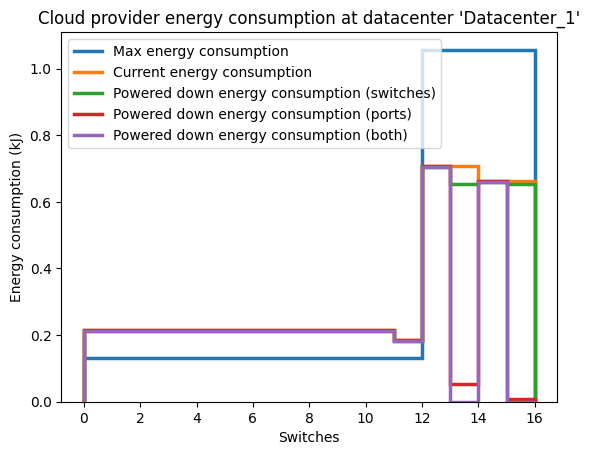

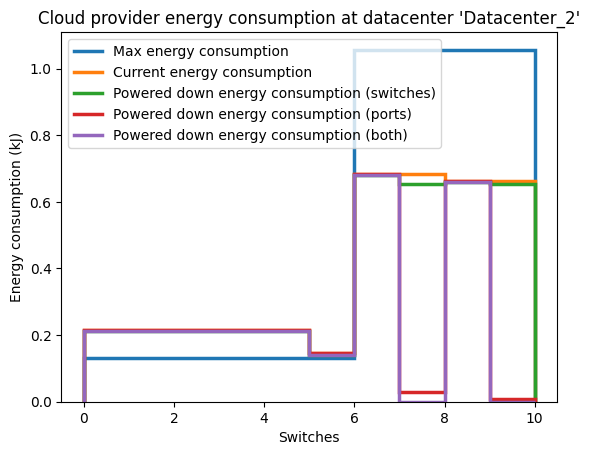

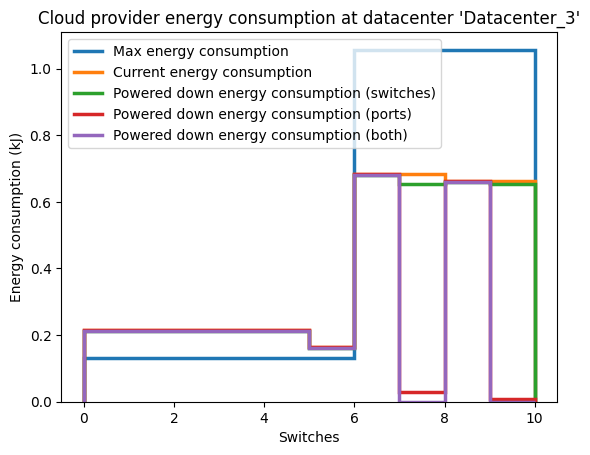

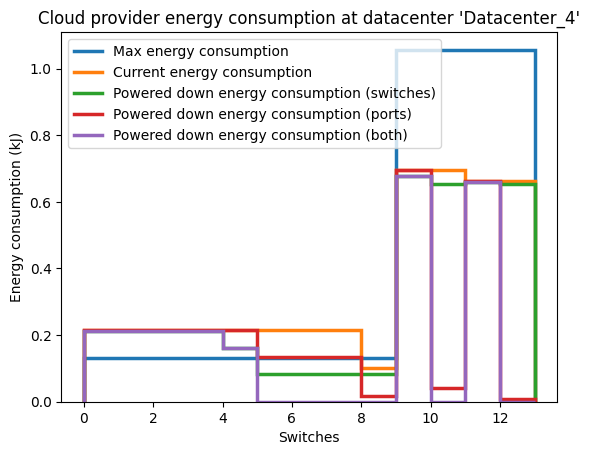

In [55]:
# datacenters_max_power_consumption
# datacenters_current_state_power_consumption_per_switch
# datacenters_current_state_power_consumption_per_switch_power_down_ports
# datacenters_current_state_power_consumption_per_switch_power_down_switches
# datacenters_current_state_power_consumption_per_switch_power_down_both

# cloud_provider_max_power_consumption_per_switch
# cloud_provider_current_state_power_consumption_per_switch
# cloud_provider_current_state_power_consumption_per_switch_power_down_switches
# cloud_provider_current_state_power_consumption_per_switch_power_down_ports
# cloud_provider_current_state_power_consumption_per_switch_power_down_both
line_width = 2.5
for index, label in enumerate(labels):
    plt.stairs((datacenters_max_power_consumption[index] / 1000) * 1, linewidth=line_width, label="Max energy consumption")
    plt.stairs((datacenters_current_state_power_consumption_per_switch[index] / 1000) * 1, linewidth=line_width, label="Current energy consumption")
    plt.stairs((datacenters_current_state_power_consumption_per_switch_power_down_ports[index] / 1000) * 1, linewidth=line_width, label="Powered down energy consumption (switches)")
    plt.stairs((datacenters_current_state_power_consumption_per_switch_power_down_switches[index] / 1000) * 1, linewidth=line_width, label="Powered down energy consumption (ports)")
    plt.stairs((datacenters_current_state_power_consumption_per_switch_power_down_both[index] / 1000) * 1, linewidth=line_width, label="Powered down energy consumption (both)")
    # plt.xticks(np.arange(len(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both)), labels)
    plt.xlabel("Switches")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Cloud provider energy consumption at datacenter '{label}'")
    plt.legend()
    plt.show()

In [56]:
datacenter_used_bw = np.subtract(datacenter_max_bw, datacenter_available_bw)
datacenter_used_power_down_switches_bw = np.subtract(datacenter_max_bw, datacenter_power_down_switches_available_bw)
datacenter_used_power_down_ports_bw = np.subtract(datacenter_max_bw, datacenter_power_down_ports_available_bw)
datacenter_used_power_down_both_bw = np.subtract(datacenter_max_bw, datacenter_power_down_both_available_bw)

print("Switchports powered down:")
print(f"Out of the {np.sum(datacenter_max_bw)} total data center bandwidth {np.sum(datacenter_used_power_down_ports_bw)} are used. (percent: {(np.sum(datacenter_used_power_down_ports_bw)/np.sum(datacenter_max_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_switches)} total switches {np.sum(datacenter_switches_power_down_ports_powered_on)} are powered on while {np.sum(datacenter_switches_power_down_ports_powered_off)} are powered off. (percent: {(np.sum(datacenter_switches_power_down_ports_powered_on)/np.sum(datacenter_switches))*100}%)")
print(f"Out of the {np.sum(datacenter_switchports)} total switch ports {np.sum(datacenter_switchports_power_down_ports_powered_on)} are powered on while {np.sum(datacenter_switchports_power_down_ports_powered_off)} are powered off. (percent: {(np.sum(datacenter_switchports_power_down_ports_powered_on)/np.sum(datacenter_switchports))*100}%)")
print()

print("Switches powered down:")
print(f"Out of the {np.sum(datacenter_max_bw)} total data center bandwidth {np.sum(datacenter_used_power_down_switches_bw)} are used. (percent: {(np.sum(datacenter_used_power_down_switches_bw)/np.sum(datacenter_max_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_switches)} total switches {np.sum(datacenter_switches_power_down_switches_powered_on)} are powered on while {np.sum(datacenter_switches_power_down_switches_powered_off)} are powered off. (percent: {(np.sum(datacenter_switches_power_down_switches_powered_on)/np.sum(datacenter_switches))*100}%)")
print(f"Out of the {np.sum(datacenter_switchports)} total switch ports {np.sum(datacenter_switchports_power_down_switches_powered_on)} are powered on while {np.sum(datacenter_switchports_power_down_switches_powered_off)} are powered off. (percent: {(np.sum(datacenter_switchports_power_down_switches_powered_on)/np.sum(datacenter_switchports))*100}%)")
print()

print("Switches and switchports powered down:")
print(f"Out of the {np.sum(datacenter_max_bw)} total data center bandwidth {np.sum(datacenter_used_power_down_both_bw)} are used. (percent: {(np.sum(datacenter_used_power_down_both_bw)/np.sum(datacenter_max_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_switches)} total switches {np.sum(datacenter_switches_power_down_both_powered_on)} are powered on while {np.sum(datacenter_switches_power_down_both_powered_off)} are powered off. (percent: {(np.sum(datacenter_switches_power_down_both_powered_on)/np.sum(datacenter_switches))*100}%)")
print(f"Out of the {np.sum(datacenter_switchports)} total switch ports {np.sum(datacenter_switchports_power_down_both_powered_on)} are powered on while {np.sum(datacenter_switchports_power_down_both_powered_off)} are powered off. (percent: {(np.sum(datacenter_switchports_power_down_both_powered_on)/np.sum(datacenter_switchports))*100}%)")
print()

print("Compared to:")
print(f"Out of the {np.sum(datacenter_max_bw)} total data center bandwidth {np.sum(datacenter_used_bw)} are used. (percent: {(np.sum(datacenter_used_bw)/np.sum(datacenter_max_bw))*100}%)")
print(f"Out of the {np.sum(datacenter_switches)} total switches {np.sum(datacenter_switches_powered_on)} are powered on while {np.sum(datacenter_switches_powered_off)} are powered off. (percent: {(np.sum(datacenter_switches_powered_on)/np.sum(datacenter_switches))*100}%)")
print(f"Out of the {np.sum(datacenter_switchports)} total switch ports {np.sum(datacenter_switchports_powered_on)} are powered on while {np.sum(datacenter_switchports_powered_off)} are powered off. (percent: {(np.sum(datacenter_switchports_powered_on)/np.sum(datacenter_switchports))*100}%)")

Switchports powered down:
Out of the 29160000.0 total data center bandwidth 2511586.0 are used. (percent: 8.613120713305898%)
Out of the 49.0 total switches 49.0 are powered on while 0.0 are powered off. (percent: 100.0%)
Out of the 2916.0 total switch ports 997.0 are powered on while 1919.0 are powered off. (percent: 34.19067215363511%)

Switches powered down:
Out of the 29160000.0 total data center bandwidth 10421586.0 are used. (percent: 35.739320987654324%)
Out of the 49.0 total switches 37.0 are powered on while 12.0 are powered off. (percent: 75.51020408163265%)
Out of the 2916.0 total switch ports 1214.0 are powered on while 1702.0 are powered off. (percent: 41.63237311385459%)

Switches and switchports powered down:
Out of the 29160000.0 total data center bandwidth 10971586.0 are used. (percent: 37.625466392318245%)
Out of the 49.0 total switches 37.0 are powered on while 12.0 are powered off. (percent: 75.51020408163265%)
Out of the 2916.0 total switch ports 997.0 are powered 

In [57]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print("Switchports powered down:")
    print(f"Out of the {datacenter_max_bw[index]} total data center bandwidth {datacenter_used_power_down_ports_bw[index]} are used. (percent: {(datacenter_used_power_down_ports_bw[index]/datacenter_max_bw[index])*100}%)")
    print(f"Out of the {datacenter_switches[index]} total switches {datacenter_switches_power_down_ports_powered_on[index]} are powered on while {datacenter_switches_power_down_ports_powered_off[index]} are powered off. (percent: {(datacenter_switches_power_down_ports_powered_on[index]/datacenter_switches[index])*100}%)")
    print(f"Out of the {datacenter_switchports[index]} total switch ports {datacenter_switchports_power_down_ports_powered_on[index]} are powered on while {datacenter_switchports_power_down_ports_powered_off[index]} are powered off. (percent: {(datacenter_switchports_power_down_ports_powered_on[index]/datacenter_switchports[index])*100}%)")
    print()

    print("Switches powered down:")
    print(f"Out of the {datacenter_max_bw[index]} total data center bandwidth {datacenter_used_power_down_switches_bw[index]} are used. (percent: {(datacenter_used_power_down_switches_bw[index]/datacenter_max_bw[index])*100}%)")
    print(f"Out of the {datacenter_switches[index]} total switches {datacenter_switches_power_down_switches_powered_on[index]} are powered on while {datacenter_switches_power_down_switches_powered_off[index]} are powered off. (percent: {(datacenter_switches_power_down_switches_powered_on[index]/datacenter_switches[index])*100}%)")
    print(f"Out of the {datacenter_switchports[index]} total switch ports {datacenter_switchports_power_down_switches_powered_on[index]} are powered on while {datacenter_switchports_power_down_switches_powered_off[index]} are powered off. (percent: {(datacenter_switchports_power_down_switches_powered_on[index]/datacenter_switchports[index])*100}%)")
    print()

    print("Switches and switchports powered down:")
    print(f"Out of the {datacenter_max_bw[index]} total data center bandwidth {datacenter_used_power_down_both_bw[index]} are used. (percent: {(datacenter_used_power_down_both_bw[index]/datacenter_max_bw[index])*100}%)")
    print(f"Out of the {datacenter_switches[index]} total switches {datacenter_switches_power_down_both_powered_on[index]} are powered on while {datacenter_switches_power_down_both_powered_off[index]} are powered off. (percent: {(datacenter_switches_power_down_both_powered_on[index]/datacenter_switches[index])*100}%)")
    print(f"Out of the {datacenter_switchports[index]} total switch ports {datacenter_switchports_power_down_both_powered_on[index]} are powered on while {datacenter_switchports_power_down_both_powered_off[index]} are powered off. (percent: {(datacenter_switchports_power_down_both_powered_on[index]/datacenter_switchports[index])*100}%)")
    print()

    print("Compared to:")
    print(f"Out of the {datacenter_max_bw[index]} total data center bandwidth {datacenter_used_bw[index]} are used. (percent: {(datacenter_used_bw[index]/datacenter_max_bw[index])*100}%)")
    print(f"Out of the {datacenter_switches[index]} total switches {datacenter_switches_powered_on[index]} are powered on while {datacenter_switches_powered_off[index]} are powered off. (percent: {(datacenter_switches_powered_on[index]/datacenter_switches[index])*100}%)")
    print(f"Out of the {datacenter_switchports[index]} total switch ports {datacenter_switchports_powered_on[index]} are powered on while {datacenter_switchports_powered_off[index]} are powered off. (percent: {(datacenter_switchports_powered_on[index]/datacenter_switchports[index])*100}%)")
    print()

---------- Datacenter_1 ----------
Switchports powered down:
Out of the 8640000.0 total data center bandwidth 408282.0 are used. (percent: 4.725486111111111%)
Out of the 16.0 total switches 16.0 are powered on while 0.0 are powered off. (percent: 100.0%)
Out of the 864.0 total switch ports 426.0 are powered on while 438.0 are powered off. (percent: 49.30555555555556%)

Switches powered down:
Out of the 8640000.0 total data center bandwidth 2268282.0 are used. (percent: 26.25326388888889%)
Out of the 16.0 total switches 14.0 are powered on while 2.0 are powered off. (percent: 87.5%)
Out of the 864.0 total switch ports 456.0 are powered on while 408.0 are powered off. (percent: 52.77777777777778%)

Switches and switchports powered down:
Out of the 8640000.0 total data center bandwidth 2408282.0 are used. (percent: 27.873634259259262%)
Out of the 16.0 total switches 14.0 are powered on while 2.0 are powered off. (percent: 87.5%)
Out of the 864.0 total switch ports 426.0 are powered on whi

Power

In [58]:
print("Switchports powered down:")
print(f"The maximum power consumption for the cloud provider is {np.sum(datacenter_max_power)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_power_down_ports_power)}W")
print(f"The cloud provider is saving {np.sum(datacenter_max_power) - np.sum(datacenter_power_down_ports_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_power_down_ports_power) / np.sum(datacenter_max_power)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(datacenter_max_power) - np.sum(datacenter_power_down_ports_power)) / np.sum(datacenter_max_power)) * 100}% of their full power consumption.")
print()
print(f"The maximum energy consumption for the cloud provider is {(np.sum(datacenter_max_power) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_power_down_ports_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(datacenter_max_power) * 1) / 1000) - ((np.sum(datacenter_power_down_ports_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_power_down_ports_power) * 1) / 1000) / ((np.sum(datacenter_max_power) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(datacenter_max_power) - np.sum(datacenter_power_down_ports_power)) * 1) / 1000) / ((np.sum(datacenter_max_power) * 1) / 1000)) * 100}% energy (kJ/s).")
print()
print()

print("Switches powered down:")
print(f"The maximum power consumption for the cloud provider is {np.sum(datacenter_max_power)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_power_down_switches_power)}W")
print(f"The cloud provider is saving {np.sum(datacenter_max_power) - np.sum(datacenter_power_down_switches_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_power_down_switches_power) / np.sum(datacenter_max_power)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(datacenter_max_power) - np.sum(datacenter_power_down_switches_power)) / np.sum(datacenter_max_power)) * 100}% of their full power consumption.")
print()
print(f"The maximum energy consumption for the cloud provider is {(np.sum(datacenter_max_power) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_power_down_switches_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(datacenter_max_power) * 1) / 1000) - ((np.sum(datacenter_power_down_switches_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_power_down_switches_power) * 1) / 1000) / ((np.sum(datacenter_max_power) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(datacenter_max_power) - np.sum(datacenter_power_down_switches_power)) * 1) / 1000) / ((np.sum(datacenter_max_power) * 1) / 1000)) * 100}% energy (kJ/s).")
print()
print()

print("Switches and switchports powered down:")
print(f"The maximum power consumption for the cloud provider is {np.sum(datacenter_max_power)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_power_down_both_power)}W")
print(f"The cloud provider is saving {np.sum(datacenter_max_power) - np.sum(datacenter_power_down_both_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_power_down_both_power) / np.sum(datacenter_max_power)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(datacenter_max_power) - np.sum(datacenter_power_down_both_power)) / np.sum(datacenter_max_power)) * 100}% of their full power consumption.")
print()
print(f"The maximum energy consumption for the cloud provider is {(np.sum(datacenter_max_power) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_power_down_both_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(datacenter_max_power) * 1) / 1000) - ((np.sum(datacenter_power_down_both_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_power_down_both_power) * 1) / 1000) / ((np.sum(datacenter_max_power) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(datacenter_max_power) - np.sum(datacenter_power_down_both_power)) * 1) / 1000) / ((np.sum(datacenter_max_power) * 1) / 1000)) * 100}% energy (kJ/s).")
print()
print()

print("Compared to:")
print(f"The maximum power consumption for the cloud provider is {np.sum(datacenter_max_power)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_current_power)}W")
print(f"The cloud provider is saving {np.sum(datacenter_max_power) - np.sum(datacenter_current_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_current_power) / np.sum(datacenter_max_power)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(datacenter_max_power) - np.sum(datacenter_current_power)) / np.sum(datacenter_max_power)) * 100}% of their full power consumption.")
print()
print(f"The maximum energy consumption for the cloud provider is {(np.sum(datacenter_max_power) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_current_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(datacenter_max_power) * 1) / 1000) - ((np.sum(datacenter_current_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_current_power) * 1) / 1000) / ((np.sum(datacenter_max_power) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(datacenter_max_power) - np.sum(datacenter_current_power)) * 1) / 1000) / ((np.sum(datacenter_max_power) * 1) / 1000)) * 100}% energy (kJ/s).")

Switchports powered down:
The maximum power consumption for the cloud provider is 21255.720000000045W
The current power consumption for the cloud provider is 16885.08W
The cloud provider is saving 4370.640000000043W
The cloud provider is thus using 79.43781720873237% of their full power consumption.
The cloud provider is thus using 20.562182791267638% of their full power consumption.

The maximum energy consumption for the cloud provider is 21.255720000000046kJ/s
The current energy consumption for the cloud provider is 16.885080000000002kJ/s
The cloud provider is saving 4.370640000000044kJ/s
The cloud provider is thus using 79.43781720873235% of their full energy consumption (kJ/s).
The cloud provider is saving 20.562182791267638% energy (kJ/s).


Switches powered down:
The maximum power consumption for the cloud provider is 21255.720000000045W
The current power consumption for the cloud provider is 12127.199999999999W
The cloud provider is saving 9128.520000000046W
The cloud provider 

In [59]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print("Switchports powered down:")
    print(f"The maximum power consumption for the cloud provider is {datacenter_max_power[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_power_down_ports_power[index]}W")
    print(f"The cloud provider is saving {datacenter_max_power[index] - datacenter_power_down_ports_power[index]}W")
    print(f"The cloud provider is thus using {(datacenter_power_down_ports_power[index] / datacenter_max_power[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((datacenter_max_power[index] - datacenter_power_down_ports_power[index]) / datacenter_max_power[index]) * 100}% of their full power consumption.")
    print()
    print(f"The maximum energy consumption for the cloud provider is {(datacenter_max_power[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_power_down_ports_power[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((datacenter_max_power[index] * 1) / 1000) - ((datacenter_power_down_ports_power[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_power_down_ports_power[index] * 1) / 1000) / ((datacenter_max_power[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((datacenter_max_power[index] - datacenter_power_down_ports_power[index]) * 1) / 1000) / ((datacenter_max_power[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()
    print()

    print("Switches powered down:")
    print(f"The maximum power consumption for the cloud provider is {datacenter_max_power[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_power_down_switches_power[index]}W")
    print(f"The cloud provider is saving {datacenter_max_power[index] - datacenter_power_down_switches_power[index]}W")
    print(f"The cloud provider is thus using {(datacenter_power_down_switches_power[index] / datacenter_max_power[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((datacenter_max_power[index] - datacenter_power_down_switches_power[index]) / datacenter_max_power[index]) * 100}% of their full power consumption.")
    print()
    print(f"The maximum energy consumption for the cloud provider is {(datacenter_max_power[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_power_down_switches_power[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((datacenter_max_power[index] * 1) / 1000) - ((datacenter_power_down_switches_power[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_power_down_switches_power[index] * 1) / 1000) / ((datacenter_max_power[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((datacenter_max_power[index] - datacenter_power_down_switches_power[index]) * 1) / 1000) / ((datacenter_max_power[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()
    print()

    print("Switches and switchports powered down:")
    print(f"The maximum power consumption for the cloud provider is {datacenter_max_power[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_power_down_both_power[index]}W")
    print(f"The cloud provider is saving {datacenter_max_power[index] - datacenter_power_down_both_power[index]}W")
    print(f"The cloud provider is thus using {(datacenter_power_down_both_power[index] / datacenter_max_power[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((datacenter_max_power[index] - datacenter_power_down_both_power[index]) / datacenter_max_power[index]) * 100}% of their full power consumption.")
    print()
    print(f"The maximum energy consumption for the cloud provider is {(datacenter_max_power[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_power_down_both_power[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((datacenter_max_power[index] * 1) / 1000) - ((datacenter_power_down_both_power[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_power_down_both_power[index] * 1) / 1000) / ((datacenter_max_power[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((datacenter_max_power[index] - datacenter_power_down_both_power[index]) * 1) / 1000) / ((datacenter_max_power[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()
    print()

    print("Compared to:")
    print(f"The maximum power consumption for the cloud provider is {datacenter_max_power[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_current_power[index]}W")
    print(f"The cloud provider is saving {datacenter_max_power[index] - datacenter_current_power[index]}W")
    print(f"The cloud provider is thus using {(datacenter_current_power[index] / datacenter_max_power[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((datacenter_max_power[index] - datacenter_current_power[index]) / datacenter_max_power[index]) * 100}% of their full power consumption.")
    print()
    print(f"The maximum energy consumption for the cloud provider is {(datacenter_max_power[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_current_power[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((datacenter_max_power[index] * 1) / 1000) - ((datacenter_current_power[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_current_power[index] * 1) / 1000) / ((datacenter_max_power[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((datacenter_max_power[index] - datacenter_current_power[index]) * 1) / 1000) / ((datacenter_max_power[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()

---------- Datacenter_1 ----------
Switchports powered down:
The maximum power consumption for the cloud provider is 5808.480000000011W
The current power consumption for the cloud provider is 5185.68W
The cloud provider is saving 622.8000000000111W
The cloud provider is thus using 89.27774564085595% of their full power consumption.
The cloud provider is thus using 10.722254359144042% of their full power consumption.

The maximum energy consumption for the cloud provider is 5.808480000000011kJ/s
The current energy consumption for the cloud provider is 5.1856800000000005kJ/s
The cloud provider is saving 0.6228000000000105kJ/s
The cloud provider is thus using 89.27774564085597% of their full energy consumption (kJ/s).
The cloud provider is saving 10.722254359144044% energy (kJ/s).


Switches powered down:
The maximum power consumption for the cloud provider is 5808.480000000011W
The current power consumption for the cloud provider is 3987.84W
The cloud provider is saving 1820.640000000011

### Calculating the Energy efficiency through Power Usage Effectiveness (PUE)

In [60]:
print(f"Power Usage Effectiveness (PUE) (scoped to switches) of approaches:")
print(f"- Powering down switches {np.sum(cloud_provider_max_power_consumption_per_datacenter) - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_switches)}")
print(f"- Powering down ports {np.sum(cloud_provider_max_power_consumption_per_datacenter) - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports)}")
print(f"- Powering down switches and ports {np.sum(cloud_provider_max_power_consumption_per_datacenter) - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both)}")

Power Usage Effectiveness (PUE) (scoped to switches) of approaches:
- Powering down switches 21800.280000000123
- Powering down ports 9721.440000000133
- Powering down switches and ports 23143.200000000128


In [61]:
print(f"Power Usage Effectiveness (PUE) (scoped to switches) of approaches over the duration {simulation_duration}:")
print(f"- Powering down switches {np.sum(cloud_provider_max_power_consumption_per_datacenter) - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_switches)}")
print(f"- Powering down ports {np.sum(cloud_provider_max_power_consumption_per_datacenter) - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports)}")
print(f"- Powering down switches and ports {np.sum(cloud_provider_max_power_consumption_per_datacenter) - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both)}")

Power Usage Effectiveness (PUE) (scoped to switches) of approaches over the duration 3.6094:
- Powering down switches 21800.280000000123
- Powering down ports 9721.440000000133
- Powering down switches and ports 23143.200000000128


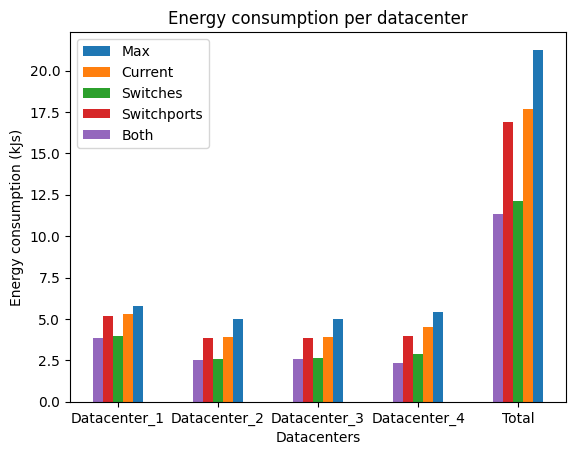

In [62]:
bar_width = 0.1
x = np.arange(len(labels) + 1)
plt.bar(x + bar_width * 2, (np.append(datacenter_max_power, np.sum(datacenter_max_power)) * 1) / 1000, bar_width, label="Max")
plt.bar(x + bar_width, (np.append(datacenter_current_power, np.sum(datacenter_current_power)) * 1) / 1000, bar_width, label="Current")
plt.bar(x, (np.append(datacenter_power_down_switches_power, np.sum(datacenter_power_down_switches_power)) * 1) / 1000, bar_width, label="Switches")
plt.bar(x - bar_width , (np.append(datacenter_power_down_ports_power, np.sum(datacenter_power_down_ports_power)) * 1) / 1000, bar_width, label="Switchports")
plt.bar(x - bar_width * 2, (np.append(datacenter_power_down_both_power, np.sum(datacenter_power_down_both_power)) * 1) / 1000, bar_width, label="Both")
plt.xticks(x, np.append(labels, "Total"))
# plt.figure(figsize=(15,10))
plt.xlabel("Datacenters")
plt.ylabel("Energy consumption (kJs)")
plt.title("Energy consumption per datacenter")
plt.legend()
plt.show()


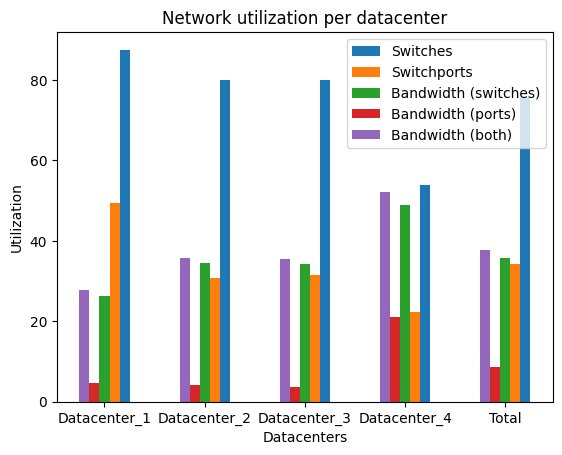

In [63]:
bar_width = 0.1
x = np.arange(len(labels) + 1)
# plt.bar(x + bar_width * 2, (np.append(datacenter_max_power, np.sum(datacenter_max_power)) * 1) / 1000, bar_width, label="Max")
plt.bar(x + bar_width * 2, (np.append(datacenter_switches_power_down_both_powered_on, np.sum(datacenter_switches_power_down_both_powered_on)) * 100) / np.append(datacenter_switches, np.sum(datacenter_switches)), bar_width, label="Switches")
plt.bar(x + bar_width, (np.append(datacenter_switchports_power_down_both_powered_on, np.sum(datacenter_switchports_power_down_both_powered_on)) * 100) / np.append(datacenter_switchports, np.sum(datacenter_switchports)), bar_width, label="Switchports")
plt.bar(x, (np.append(datacenter_used_power_down_switches_bw, np.sum(datacenter_used_power_down_switches_bw)) * 100) / np.append(datacenter_max_bw, np.sum(datacenter_max_bw)), bar_width, label="Bandwidth (switches)")
plt.bar(x - bar_width, (np.append(datacenter_used_power_down_ports_bw, np.sum(datacenter_used_power_down_ports_bw)) * 100) / np.append(datacenter_max_bw, np.sum(datacenter_max_bw)), bar_width, label="Bandwidth (ports)")
plt.bar(x - bar_width * 2, (np.append(datacenter_used_power_down_both_bw, np.sum(datacenter_used_power_down_both_bw)) * 100) / np.append(datacenter_max_bw, np.sum(datacenter_max_bw)), bar_width, label="Bandwidth (both)")
# plt.bar(x - bar_width * 2, (np.append(datacenter_power_down_both_power, np.sum(datacenter_power_down_both_power)) * 1) / 1000, bar_width, label="Both")
plt.xticks(x, np.append(labels, "Total"))
# plt.figure(figsize=(15,10))
plt.xlabel("Datacenters")
plt.ylabel("Utilization")
plt.title("Network utilization per datacenter")
plt.legend()
plt.show()

# print(f"Out of the {datacenter_max_bw[index]} total data center bandwidth {datacenter_used_power_down_ports_bw[index]} are used. (percent: {(datacenter_used_power_down_ports_bw[index]/datacenter_max_bw[index])*100}%)")
#     print(f"Out of the {datacenter_switches[index]} total switches {datacenter_switches_power_down_ports_powered_on[index]} are powered on while {datacenter_switches_power_down_ports_powered_off[index]} are powered off. (percent: {(datacenter_switches_power_down_ports_powered_on[index]/datacenter_switches[index])*100}%)")
#     print(f"Out of the {datacenter_switchports[index]} total switch ports {datacenter_switchports_power_down_ports_powered_on[index]} are powered on while {datacenter_switchports_power_down_ports_powered_off[index]} are powered off. (percent: {(datacenter_switchports_power_down_ports_powered_on[index]/datacenter_switchports[index])*100}%)")
#     print()



### Power over 24 hours

#### Power down switches and switchports

In [64]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print(f"The maximum power consumption for the data center is {(datacenter_max_power[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption for the data center is {(datacenter_power_down_both_power[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption each hour for the cloud provider is {(datacenter_power_down_both_power[index]*60*60) / 1000}kWh")
    print(f"The data center is saving {(datacenter_max_power[index]*24*60*60) / 1000 - (datacenter_power_down_both_power[index]*24*60*60) / 1000}kW")
    print(f"The data center is saving per hour {(datacenter_max_power[index]*60*60) / 1000 - (datacenter_power_down_both_power[index]*60*60) / 1000}kWh")
    print(f"The data center is thus using {((datacenter_power_down_both_power[index]*24*60*60) / 1000 / (datacenter_max_power[index]*24*60*60) / 1000) * 100}% of their full power consumption.")
    print(f"The data center is saving {(((datacenter_max_power[index]*24*60*60) / 1000 - (datacenter_power_down_both_power[index]*24*60*60) / 1000) / (datacenter_max_power[index]*24*60*60) / 1000) * 100}% of power (kWh).")
    print()


---------- Datacenter_1 ----------
The maximum power consumption for the data center is 501852.672000001kW
The current power consumption for the data center is 334907.136kW
The current power consumption each hour for the cloud provider is 13954.464kWh
The data center is saving 166945.536000001kW
The data center is saving per hour 6956.064000000042kWh
The data center is thus using 6.673415420213193e-05% of their full power consumption.
The data center is saving 3.326584579786808e-05% of power (kWh).

---------- Datacenter_2 ----------
The maximum power consumption for the data center is 433486.080000001kW
The current power consumption for the data center is 219521.66400000002kW
The current power consumption each hour for the cloud provider is 9146.736kWh
The data center is saving 213964.416000001kW
The data center is saving per hour 8915.184000000041kWh
The data center is thus using 5.064099497727805e-05% of their full power consumption.
The data center is saving 4.935900502272196e-05% 

#### Power down switches

In [65]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print(f"The maximum power consumption for the data center is {(datacenter_max_power[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption for the data center is {(datacenter_power_down_switches_power[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption each hour for the cloud provider is {(datacenter_power_down_switches_power[index]*60*60) / 1000}kWh")
    print(f"The data center is saving {(datacenter_max_power[index]*24*60*60) / 1000 - (datacenter_power_down_switches_power[index]*24*60*60) / 1000}kW")
    print(f"The data center is saving per hour {(datacenter_max_power[index]*60*60) / 1000 - (datacenter_power_down_switches_power[index]*60*60) / 1000}kWh")
    print(f"The data center is thus using {((datacenter_power_down_switches_power[index]*24*60*60) / 1000 / (datacenter_max_power[index]*24*60*60) / 1000) * 100}% of their full power consumption.")
    print(f"The data center is saving {(((datacenter_max_power[index]*24*60*60) / 1000 - (datacenter_power_down_switches_power[index]*24*60*60) / 1000) / (datacenter_max_power[index]*24*60*60) / 1000) * 100}% of power (kWh).")
    print()


---------- Datacenter_1 ----------
The maximum power consumption for the data center is 501852.672000001kW
The current power consumption for the data center is 344549.37600000005kW
The current power consumption each hour for the cloud provider is 14356.224000000002kWh
The data center is saving 157303.29600000096kW
The data center is saving per hour 6554.30400000004kWh
The data center is thus using 6.865548301793228e-05% of their full power consumption.
The data center is saving 3.134451698206773e-05% of power (kWh).

---------- Datacenter_2 ----------
The maximum power consumption for the data center is 433486.080000001kW
The current power consumption for the data center is 225307.008kW
The current power consumption each hour for the cloud provider is 9387.791999999998kWh
The data center is saving 208179.072000001kW
The data center is saving per hour 8674.128000000044kWh
The data center is thus using 5.197560392250645e-05% of their full power consumption.
The data center is saving 4.80

#### Power down switchports

In [66]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print(f"The maximum power consumption for the data center is {(datacenter_max_power[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption for the data center is {(datacenter_power_down_ports_power[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption each hour for the cloud provider is {(datacenter_power_down_ports_power[index]*60*60) / 1000}kWh")
    print(f"The data center is saving {(datacenter_max_power[index]*24*60*60) / 1000 - (datacenter_power_down_ports_power[index]*24*60*60) / 1000}kW")
    print(f"The data center is saving per hour {(datacenter_max_power[index]*60*60) / 1000 - (datacenter_power_down_ports_power[index]*60*60) / 1000}kWh")
    print(f"The data center is thus using {((datacenter_power_down_ports_power[index]*24*60*60) / 1000 / (datacenter_max_power[index]*24*60*60) / 1000) * 100}% of their full power consumption.")
    print(f"The data center is saving {(((datacenter_max_power[index]*24*60*60) / 1000 - (datacenter_power_down_ports_power[index]*24*60*60) / 1000) / (datacenter_max_power[index]*24*60*60) / 1000) * 100}% of power (kWh).")
    print()


---------- Datacenter_1 ----------
The maximum power consumption for the data center is 501852.672000001kW
The current power consumption for the data center is 448042.752kW
The current power consumption each hour for the cloud provider is 18668.448000000004kWh
The data center is saving 53809.92000000103kW
The data center is saving per hour 2242.080000000038kWh
The data center is thus using 8.927774564085595e-05% of their full power consumption.
The data center is saving 1.0722254359144057e-05% of power (kWh).

---------- Datacenter_2 ----------
The maximum power consumption for the data center is 433486.080000001kW
The current power consumption for the data center is 332657.2799999999kW
The current power consumption each hour for the cloud provider is 13860.72kWh
The data center is saving 100828.8000000011kW
The data center is saving per hour 4201.200000000043kWh
The data center is thus using 7.674001435063361e-05% of their full power consumption.
The data center is saving 2.3259985649